# 0. Carga Librerías

In [33]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy as sa
from sqlalchemy import create_engine, text, event
import urllib

# 1. Carga Dataset

### 1.1 Carga Dataframe

In [34]:
path= r'C:\Users\jcalabozo\Desktop\TechBI_MachineLearning\Practica Final\02 - URG Churn Model\Test.csv'
path = path.replace('\\','/')

df = pd.read_csv(path, sep=';')
df.head()

NumeroDeAfiliado  Secuencia  CodigoDeSucursal  \
0           1363281          2                 1   
1            566457          1                 2   
2           1363326          2                 2   
3           1363349          2                 2   
4           1220492          2                 1   

                 ApellidoAfiliado                  NombreAfiliado  \
0  PEREYRA                         AGUSTIN ADRIAN                   
1  RUSSO                           AZUCENA DEL ROSARIO              
2  FREYTES DE CABRERA              MARIA CRISTINA                   
3  BERTOLINA                       ORLANDO ENRIQUE                  
4  SANZ                            DAMIAN                           

   AnioIndicador  MesIndicador TipoAfiliacion DescripcionDeSexo  \
0           2022             2     Voluntario         Masculino   
1           2022             2     Individual          Femenino   
2           2022             2     Individual          Femenino   
3           2022             2     Individual         Masculino   
4           2022             2     Voluntario         Masculino   

  EstadoMesIndicadores  ... GSoloAttBanales GSoloAttCr’ticas GSinAtenciones  \
0               Activo  ...               N                N              N   
1               Activo  ...               N                N              N   
2               Activo  ...               N                N              S   
3               Activo  ...               N                N              N   
4               Activo  ...               S                N              N   

  GConAttAutoyCriticas GSinExpAuto  GSinExpCriticas  AntiguedadMeses  \
0                    S           N                N               77   
1                    S           N                N              184   
2                    N           S                S               77   
3                    S           N                N               77   
4                    N           N                S               43   

   AntiguedadSinPromo  EstadoMora  BajaTarget  
0                  77      Activo           0  
1                 184      Activo           0  
2                   0      Activo           0  
3                   0      Activo           0  
4                  43      Activo           0  

[5 rows x 40 columns]

In [35]:
df = df.rename(columns = {'GSoloAttCr’ticas': 'GSoloAttCriticas'})
df = df.rename(columns = {'ISoloAttCr’ticas': 'ISoloAttCriticas'})


In [36]:
df.columns.tolist()

['NumeroDeAfiliado',
 'Secuencia',
 'CodigoDeSucursal',
 'ApellidoAfiliado',
 'NombreAfiliado',
 'AnioIndicador',
 'MesIndicador',
 'TipoAfiliacion',
 'DescripcionDeSexo',
 'EstadoMesIndicadores',
 'Convenio',
 'DescripcionDeTipoDePago',
 'DescripcionDeInstitucionDeCobro',
 'UsoServicioAlgunaVez',
 'ConAtencionAnulada',
 'Edad',
 'QIntegrantes',
 'QAttAUTOIndividuo',
 'QAttCriticasIndividuo',
 'QAttSeguimientoIndividuo',
 'QAttVirtualesIndividuo',
 'QAttOtrosIndividuo',
 'CantidadPersonasPagan',
 'CantidadPeriodos',
 'ISoloAttBanales',
 'ISoloAttCriticas',
 'ISinAtenciones',
 'IConAttAutoyCriticas',
 'ISinExpAuto',
 'ISinExpCriticas',
 'GSoloAttBanales',
 'GSoloAttCriticas',
 'GSinAtenciones',
 'GConAttAutoyCriticas',
 'GSinExpAuto',
 'GSinExpCriticas',
 'AntiguedadMeses',
 'AntiguedadSinPromo',
 'EstadoMora',
 'BajaTarget']

### 1.2 Carga en SQL Server

In [5]:
"""server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'
params = 'DRIVER='+driver + ';SERVER='+server + ';PORT=1433;DATABASE=' + database + ';UID=' + username + ';PWD=' + password


db_params = urllib.parse.quote_plus(params)

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(db_params))

@event.listens_for(engine, "before_cursor_execute")
def receive_before_cursor_execute(
       conn, cursor, statement, params, context, executemany
        ):
            if executemany:
                cursor.fast_executemany = True
"""


'server = \'192.168.1.166\'\ndatabase = \'URG_Churn_Model\'\nusername = \'dbuser\'\npassword = \'Tech.BI.1387\'\ndriver = \'{ODBC Driver 17 for SQL Server}\'\nparams = \'DRIVER=\'+driver + \';SERVER=\'+server + \';PORT=1433;DATABASE=\' + database + \';UID=\' + username + \';PWD=\' + password\n\n\ndb_params = urllib.parse.quote_plus(params)\n\nengine = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(db_params))\n\n@event.listens_for(engine, "before_cursor_execute")\ndef receive_before_cursor_execute(\n       conn, cursor, statement, params, context, executemany\n        ):\n            if executemany:\n                cursor.fast_executemany = True\n'

In [6]:
"""table_name = 'Train'
df.to_sql(table_name,engine,index=False,if_exists="replace",schema="dbo")
"""

'table_name = \'Train\'\ndf.to_sql(table_name,engine,index=False,if_exists="replace",schema="dbo")\n'

In [7]:
"""
# Configuración de la conexión a la base de datos SQL Server
server = '192.168.1.166'
database = 'URG_Churn_Model'
username = 'dbuser'
password = 'Tech.BI.1387'
driver = '{ODBC Driver 17 for SQL Server}'  # Asegúrate de tener el controlador correcto instalado


# Establecer la cadena de conexión a la base de datos
conn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establecer la conexión con la base de datos
conn = pyodbc.connect(conn_str)

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Nombre de la tabla en la base de datos donde se importará el archivo de Excel
table_name = 'Train'

# Eliminar la tabla si ya existe (opcional)
#query = f"TRUNCATE TABLE  {table_name}"

#df = pd.read_sql(query, conn)
#conn.close()
df.to_sql(table_name, conn, if_exists='replace', index=False)
#print("¡Archivo de Excel importado correctamente en la base de datos!")
"""

'\n# Configuración de la conexión a la base de datos SQL Server\nserver = \'192.168.1.166\'\ndatabase = \'URG_Churn_Model\'\nusername = \'dbuser\'\npassword = \'Tech.BI.1387\'\ndriver = \'{ODBC Driver 17 for SQL Server}\'  # Asegúrate de tener el controlador correcto instalado\n\n\n# Establecer la cadena de conexión a la base de datos\nconn_str = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"\n\n# Establecer la conexión con la base de datos\nconn = pyodbc.connect(conn_str)\n\n# Crear un cursor para ejecutar consultas SQL\ncursor = conn.cursor()\n\n# Nombre de la tabla en la base de datos donde se importará el archivo de Excel\ntable_name = \'Train\'\n\n# Eliminar la tabla si ya existe (opcional)\n#query = f"TRUNCATE TABLE  {table_name}"\n\n#df = pd.read_sql(query, conn)\n#conn.close()\ndf.to_sql(table_name, conn, if_exists=\'replace\', index=False)\n#print("¡Archivo de Excel importado correctamente en la base de datos!")\n'

# 2 EDA

### 2.1 Manejo Nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127305 entries, 0 to 127304
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   NumeroDeAfiliado                 127305 non-null  int64 
 1   Secuencia                        127305 non-null  int64 
 2   CodigoDeSucursal                 127305 non-null  int64 
 3   ApellidoAfiliado                 127305 non-null  object
 4   NombreAfiliado                   127305 non-null  object
 5   AnioIndicador                    127305 non-null  int64 
 6   MesIndicador                     127305 non-null  int64 
 7   TipoAfiliacion                   127305 non-null  object
 8   DescripcionDeSexo                127054 non-null  object
 9   EstadoMesIndicadores             127305 non-null  object
 10  Convenio                         127305 non-null  object
 11  DescripcionDeTipoDePago          127302 non-null  object
 12  DescripcionDeIns

In [37]:
#Completa valores nulos

df['DescripcionDeTipoDePago']=df['DescripcionDeTipoDePago'].fillna('N/A')
df['DescripcionDeInstitucionDeCobro']=df['DescripcionDeInstitucionDeCobro'].fillna('N/A')
df['DescripcionDeSexo']=df['DescripcionDeSexo'].fillna('Indefinido')


In [7]:
# retrieve all labels and store in a list
columnas = df.columns.tolist()

# iterate over the list to print all unique values of each column in the dataframe
for i in columnas:
    print(i,':',df[i].unique())

NumeroDeAfiliado : [1363281  566457 1363326 ... 1125102 1220527 1363333]
Secuencia : [ 2  1  0  3  4  5  8 10 12 11  9  6  7 20 13 17 16 14 18 34 15 30 19 23
 24 27 35 22 21 32 26]
CodigoDeSucursal : [1 2]
ApellidoAfiliado : ['PEREYRA                       ' 'RUSSO                         '
 'FREYTES DE CABRERA            ' ... 'SUAREZ DELSERI                '
 'LAGAMMA                       ' 'SZAMREY                       ']
NombreAfiliado : ['AGUSTIN ADRIAN                ' 'AZUCENA DEL ROSARIO           '
 'MARIA CRISTINA                ' ... 'MARY ROSA                     '
 'RUTH FLORENCIA                ' 'MARIA EUFEMIA                 ']
AnioIndicador : [2022 2021]
MesIndicador : [ 2 11  8  7  5  1 12  6 10  9]
TipoAfiliacion : ['Voluntario' 'Individual']
DescripcionDeSexo : ['Masculino' 'Femenino' 'Indefinido']
EstadoMesIndicadores : ['Activo' 'Suspendido']
Convenio : ['MUTUAL PERSONAL LA SEGUNDA' 'SinConvenio' 'MUTUAL LEY 5110' 'DASPU'
 'MUNICIPALIDAD DE ROSARIO' 'OBRA SOCIAL

In [38]:
#Se eliminan columnas no relevantes

df=df.drop(columns=['NumeroDeAfiliado', 'ApellidoAfiliado'])

In [12]:
"""df['Secuencia']=df['Secuencia'].astype('Float64')
df['MesIndicador']=df['MesIndicador'].astype('Float64')
df['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')
"""

"df['Secuencia']=df['Secuencia'].astype('Float64')\ndf['MesIndicador']=df['MesIndicador'].astype('Float64')\ndf['CantidadPersonasPagan']=df['CantidadPersonasPagan'].astype('Float64')\n"

In [13]:
"""df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')
"""

"df[df.select_dtypes(include=np.number).columns]=df[df.select_dtypes(include=np.number).columns].astype('Float64')\n"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127305 entries, 0 to 127304
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Secuencia                        127305 non-null  int64 
 1   CodigoDeSucursal                 127305 non-null  int64 
 2   NombreAfiliado                   127305 non-null  object
 3   AnioIndicador                    127305 non-null  int64 
 4   MesIndicador                     127305 non-null  int64 
 5   TipoAfiliacion                   127305 non-null  object
 6   DescripcionDeSexo                127305 non-null  object
 7   EstadoMesIndicadores             127305 non-null  object
 8   Convenio                         127305 non-null  object
 9   DescripcionDeTipoDePago          127305 non-null  object
 10  DescripcionDeInstitucionDeCobro  127305 non-null  object
 11  UsoServicioAlgunaVez             127305 non-null  object
 12  ConAtencionAnula

In [10]:
# Generate descriptive statistics
df.describe().T

count         mean          std     min     25%  \
Secuencia                 127305.0     1.469895     1.815586     0.0     0.0   
CodigoDeSucursal          127305.0     1.555697     0.496890     1.0     1.0   
AnioIndicador             127305.0  2021.917882     0.274545  2021.0  2022.0   
MesIndicador              127305.0     2.532925     1.929792     1.0     2.0   
Edad                      127305.0    46.418216    26.988309     0.0    26.0   
QIntegrantes              127305.0     3.492047     2.003418     1.0     2.0   
QAttAUTOIndividuo         127305.0     6.494835    11.765311     0.0     0.0   
QAttCriticasIndividuo     127305.0     0.989411     3.440928     0.0     0.0   
QAttSeguimientoIndividuo  127305.0     0.085896     0.280212     0.0     0.0   
QAttVirtualesIndividuo    127305.0     0.366977     0.481982     0.0     0.0   
QAttOtrosIndividuo        127305.0     0.000660     0.025679     0.0     0.0   
CantidadPersonasPagan     127305.0     0.343969     0.476255     0.0     0.0   
CantidadPeriodos          127305.0   919.518424  2840.206315     0.0     0.0   
AntiguedadMeses           127305.0    67.451192    50.237707     1.0    23.0   
AntiguedadSinPromo        127305.0    59.266745    53.445114     0.0    11.0   
BajaTarget                127305.0     0.106681     0.308708     0.0     0.0   

                             50%     75%     max  
Secuencia                    1.0     2.0    35.0  
CodigoDeSucursal             2.0     2.0     2.0  
AnioIndicador             2022.0  2022.0  2022.0  
MesIndicador                 2.0     2.0    12.0  
Edad                        47.0    67.0   300.0  
QIntegrantes                 3.0     4.0    28.0  
QAttAUTOIndividuo            2.0     8.0   406.0  
QAttCriticasIndividuo        0.0     1.0   473.0  
QAttSeguimientoIndividuo     0.0     0.0     1.0  
QAttVirtualesIndividuo       0.0     1.0     1.0  
QAttOtrosIndividuo           0.0     0.0     1.0  
CantidadPersonasPagan        0.0     1.0     2.0  
CantidadPeriodos             0.0     4.0  9999.0  
AntiguedadMeses             58.0   107.0   195.0  
AntiguedadSinPromo          44.0   104.0   195.0  
BajaTarget                   0.0     0.0     1.0

### 2.2 Visualizaciones

##### 2.2.0 Lista variables categóricas y numéricas

In [39]:
# list of numerical features
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Secuencia', 'CodigoDeSucursal', 'AnioIndicador', 'MesIndicador',
       'Edad', 'QIntegrantes', 'QAttAUTOIndividuo', 'QAttCriticasIndividuo',
       'QAttSeguimientoIndividuo', 'QAttVirtualesIndividuo',
       'QAttOtrosIndividuo', 'CantidadPersonasPagan', 'CantidadPeriodos',
       'AntiguedadMeses', 'AntiguedadSinPromo', 'BajaTarget'],
      dtype='object')

In [40]:
# list of categorical features
cat_cols = df.drop(columns=['Convenio']).select_dtypes(include=object).columns
#cat_cols = cat_cols.delete(4)



In [41]:
cat_cols

Index(['NombreAfiliado', 'TipoAfiliacion', 'DescripcionDeSexo',
       'EstadoMesIndicadores', 'DescripcionDeTipoDePago',
       'DescripcionDeInstitucionDeCobro', 'UsoServicioAlgunaVez',
       'ConAtencionAnulada', 'ISoloAttBanales', 'ISoloAttCriticas',
       'ISinAtenciones', 'IConAttAutoyCriticas', 'ISinExpAuto',
       'ISinExpCriticas', 'GSoloAttBanales', 'GSoloAttCriticas',
       'GSinAtenciones', 'GConAttAutoyCriticas', 'GSinExpAuto',
       'GSinExpCriticas', 'EstadoMora'],
      dtype='object')

##### 2.2.1 Variables Categoricas

In [14]:
# import matplotlib and seaborn for visualization
from matplotlib import pyplot as plt
import seaborn as sns
import math

# Univariate visualization of categorical features
def categorical_feature_func(cat_cols, data, plot_columnas):
     
     plot_filas = math.ceil(len(cat_cols)/plot_columnas)
     fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
     
     for index, col in enumerate(cat_cols):
          axs_fila=index // plot_columnas
          axs_col=index % plot_columnas
          sns.countplot( x=col,data=data, ax = axs[axs_fila][axs_col])
          ax=axs[axs_fila][axs_col]
          ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
          ax.tick_params(axis='both', labelsize=20)
          ax.set_xlabel(col, fontsize=20)  
          ax.set_ylabel('Count', fontsize=20)
          



In [15]:
categorical_feature_func(cat_cols[0:6], df, 3)


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x0000028D3915AE50> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000028D39FAC5E0> (for post_execute):


KeyboardInterrupt: 

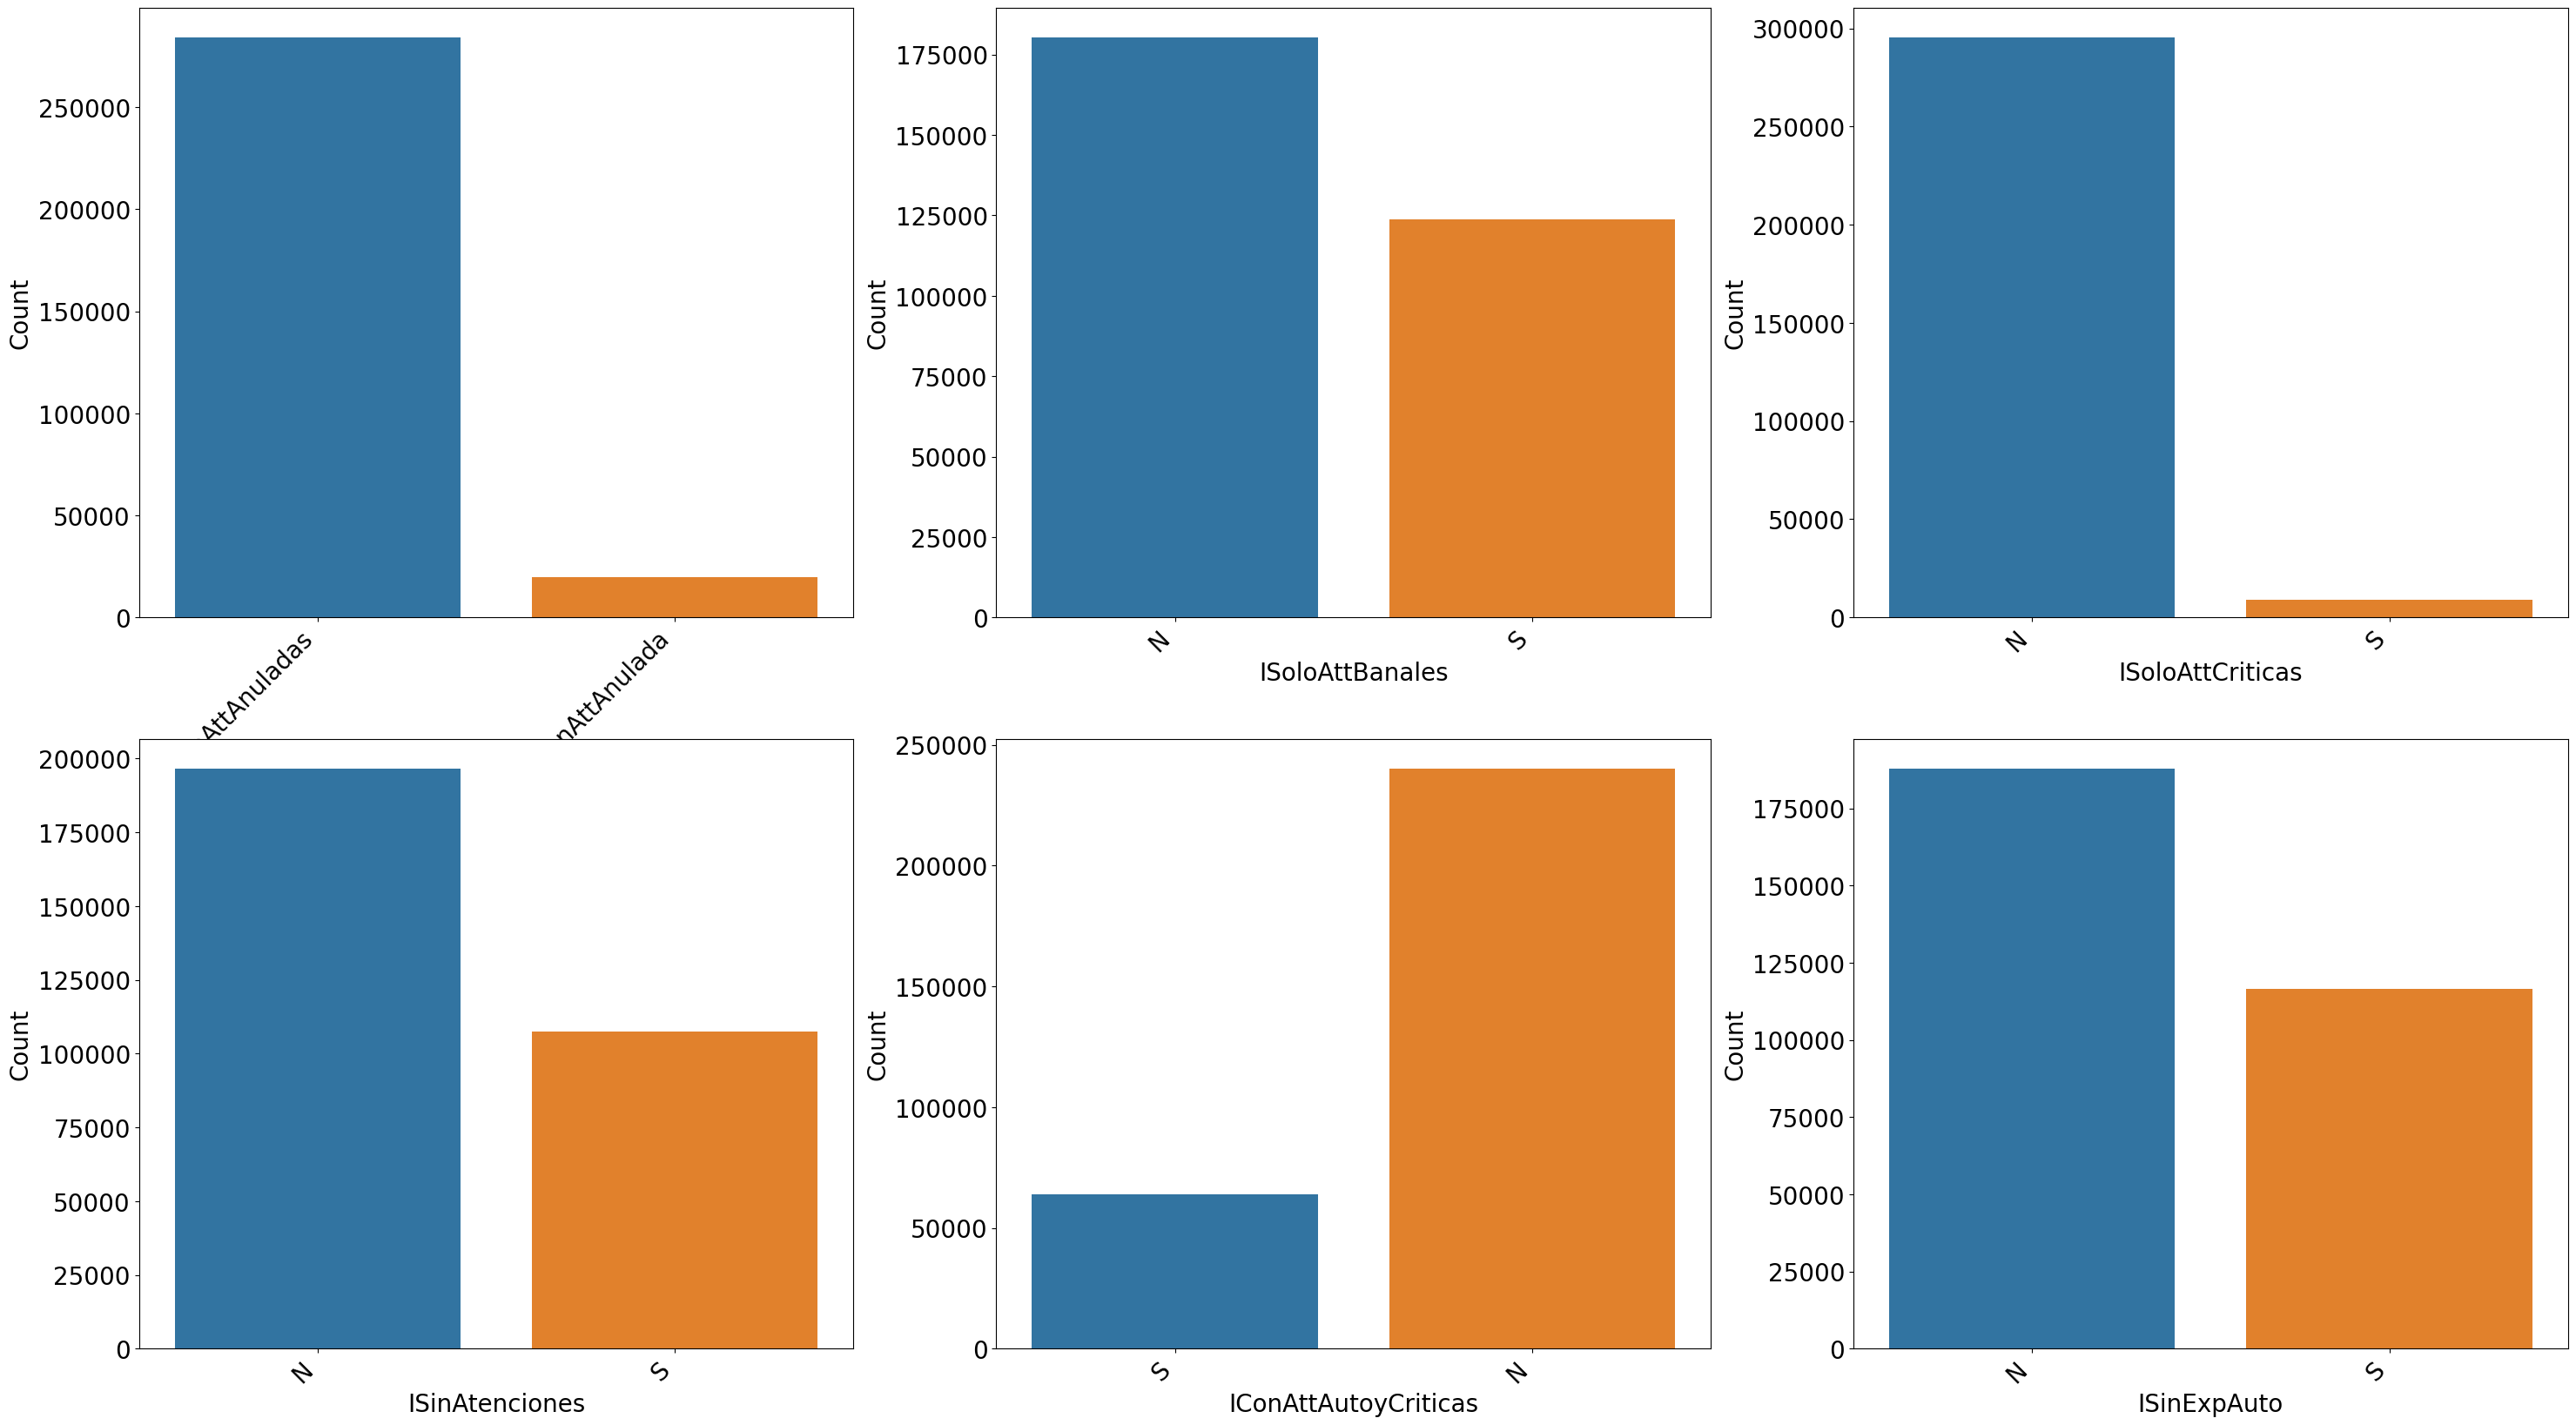

In [21]:
categorical_feature_func(cat_cols[6:12], df, 3)


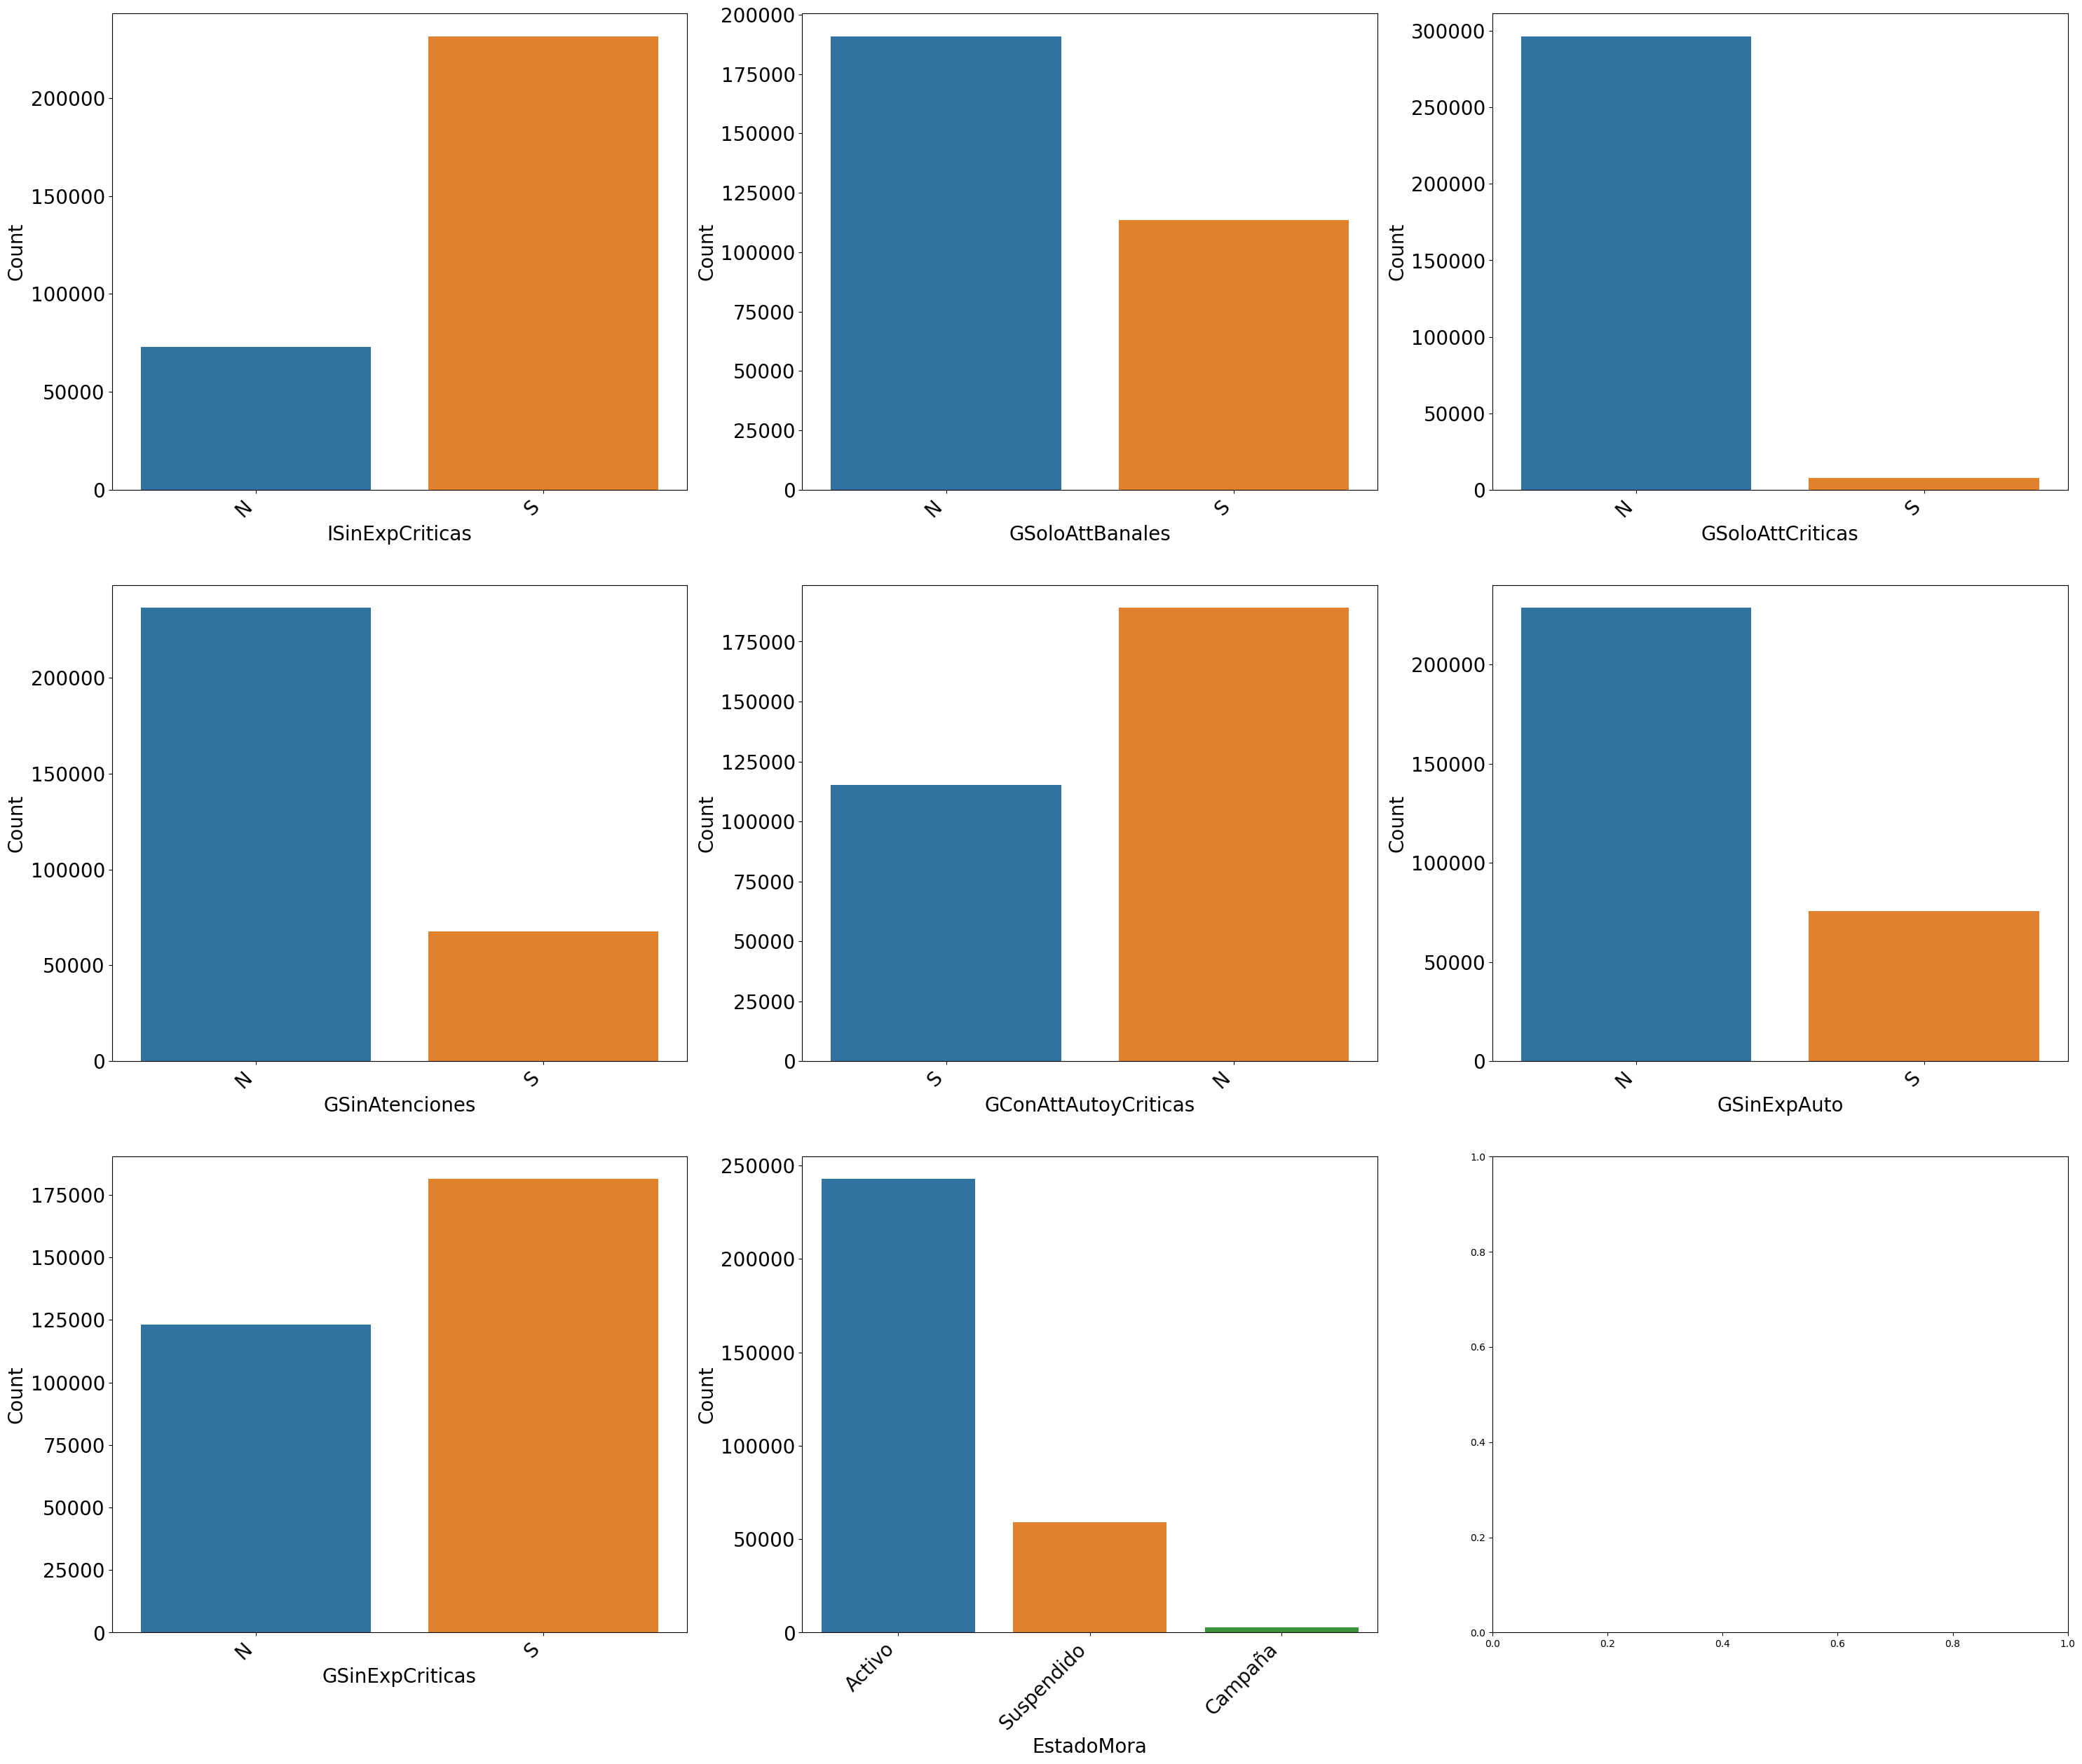

In [22]:
categorical_feature_func(cat_cols[12:], df, 3)


In [23]:
#Visualización bivariada de características categóricas
#relación entre cada variable categórica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def categorical_feature_func(cat_cols, cross_col, data, plot_columnas):

    plot_filas = math.ceil(len(cat_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(12*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(cat_cols):
            pd.crosstab(data[col],data[cross_col]).plot(kind="bar", rot=45, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(cat_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            pd.crosstab(data[col],data[cross_col]).plot( kind="bar", rot=45, ax = axs[axs_fila][axs_col])
            #sns.countplot( x=col,hue=cross_col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
           


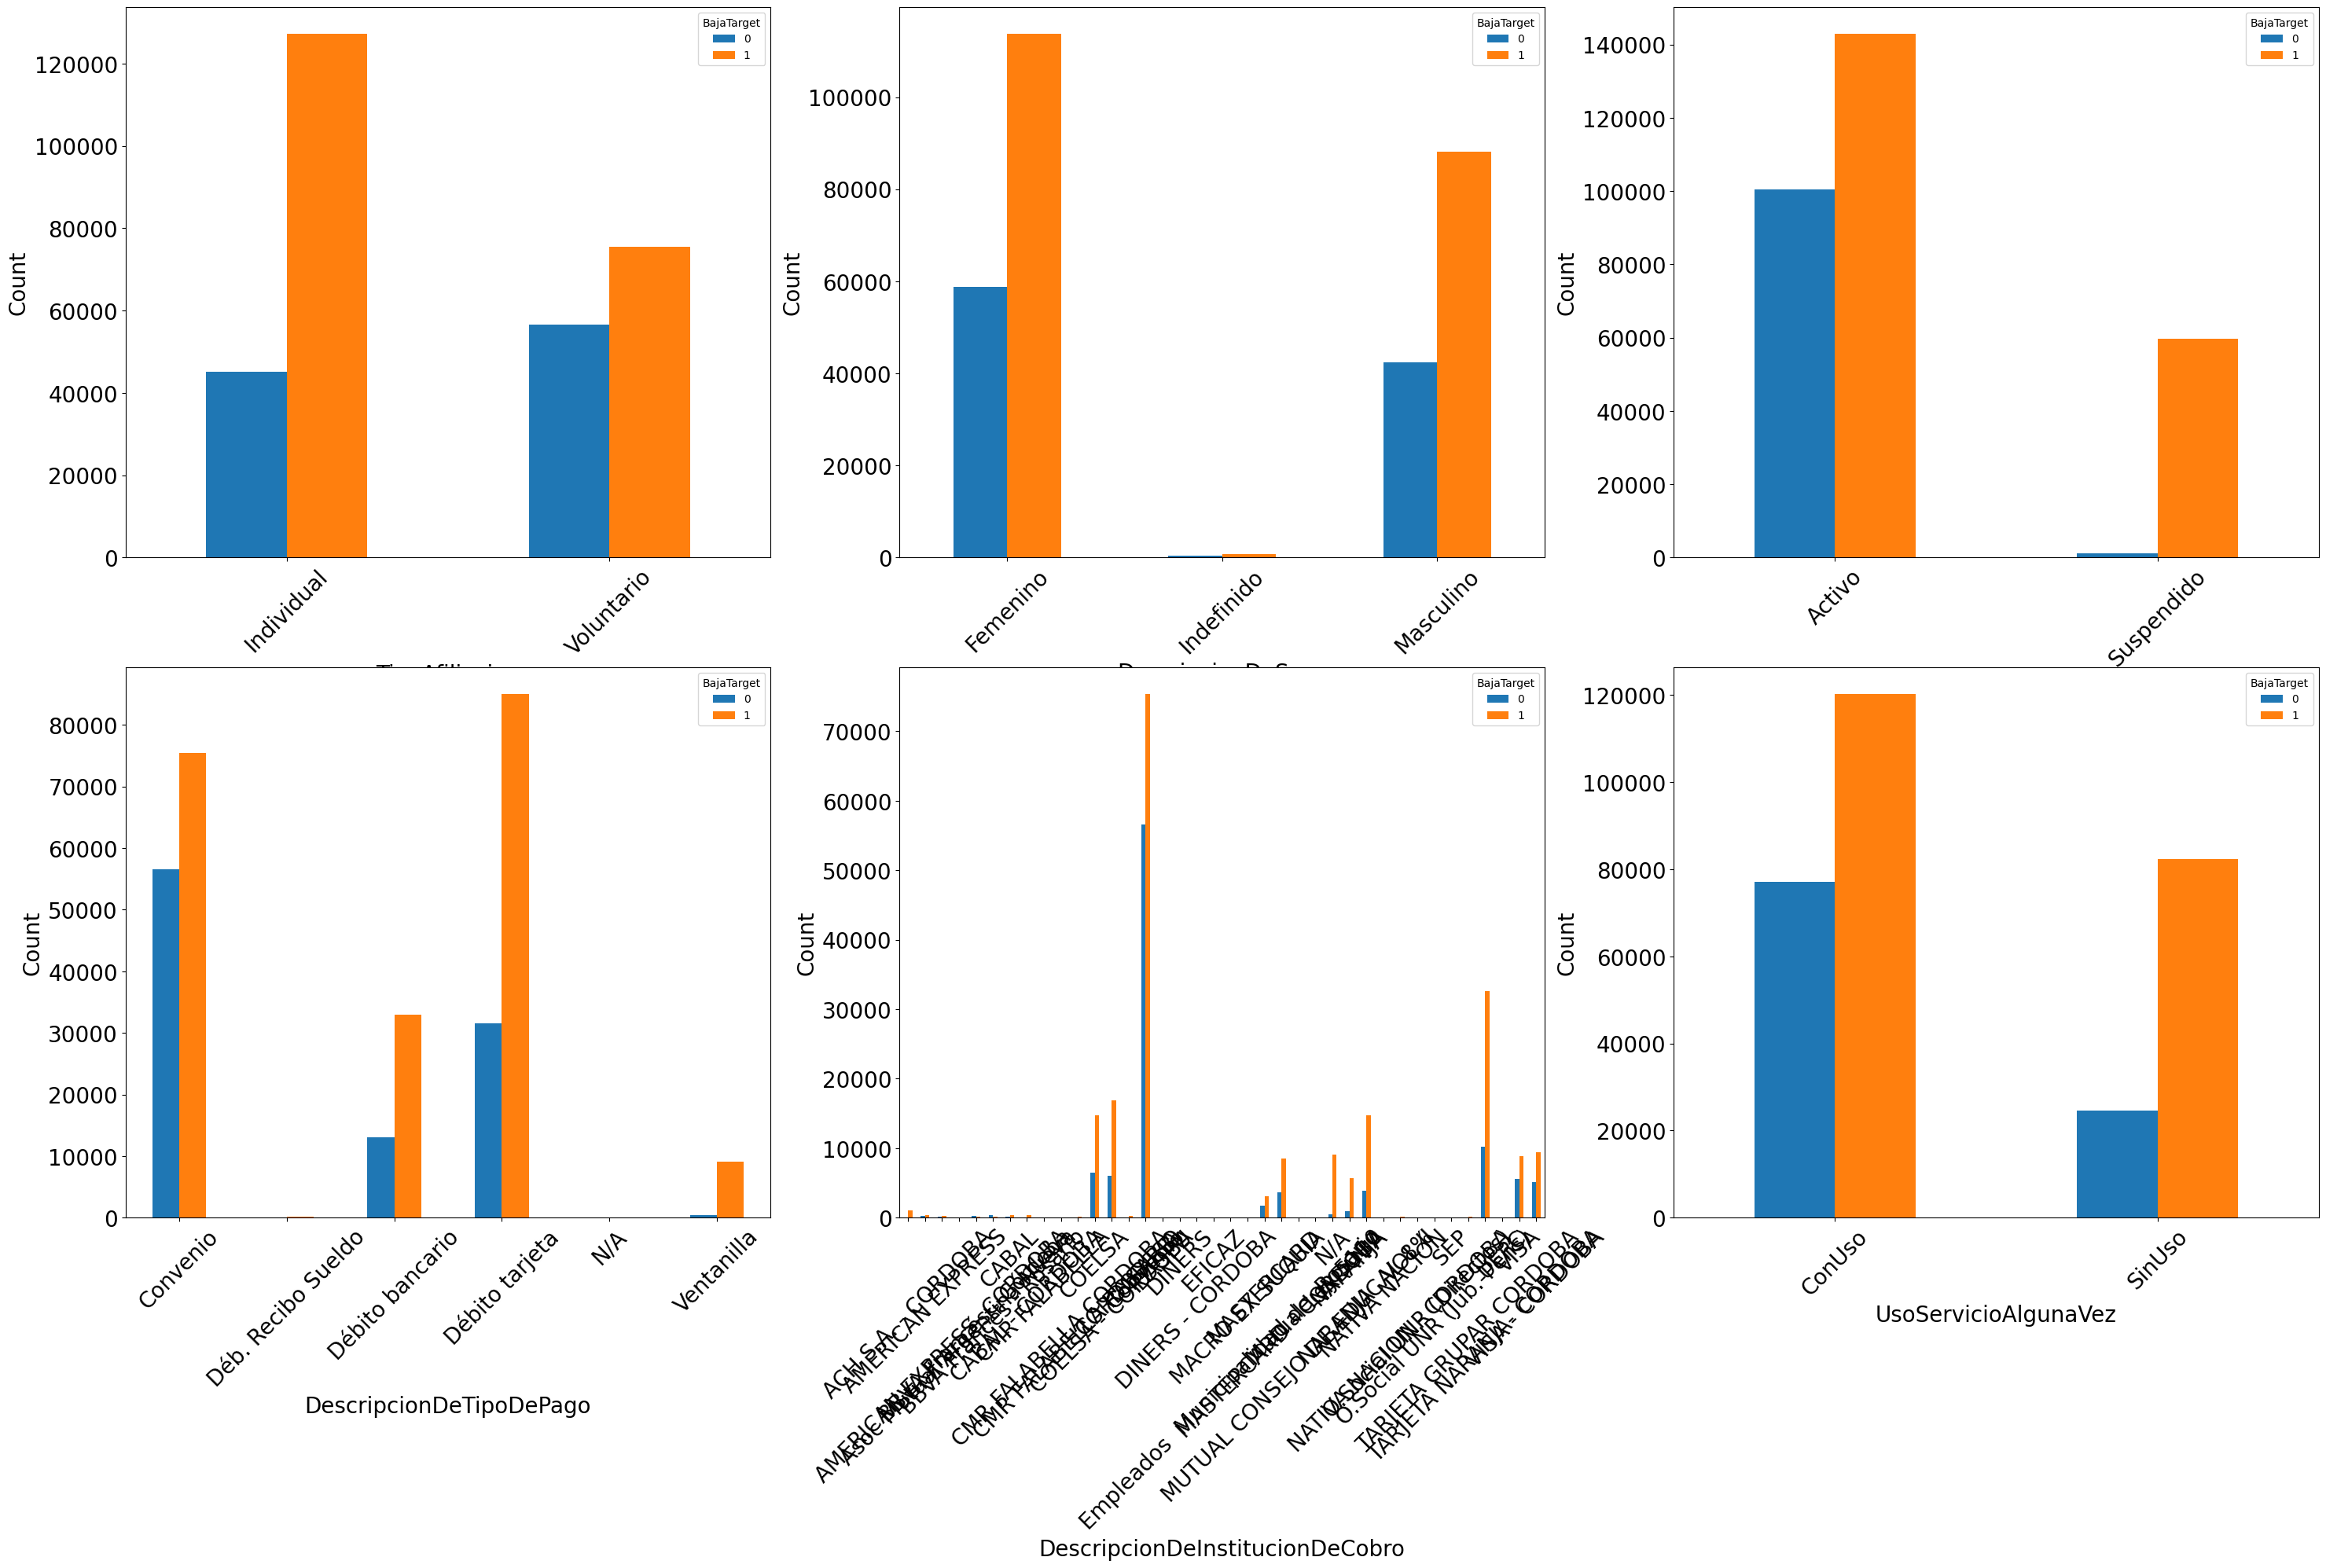

In [24]:
categorical_feature_func(cat_cols[0:6], 'BajaTarget', df, 3)

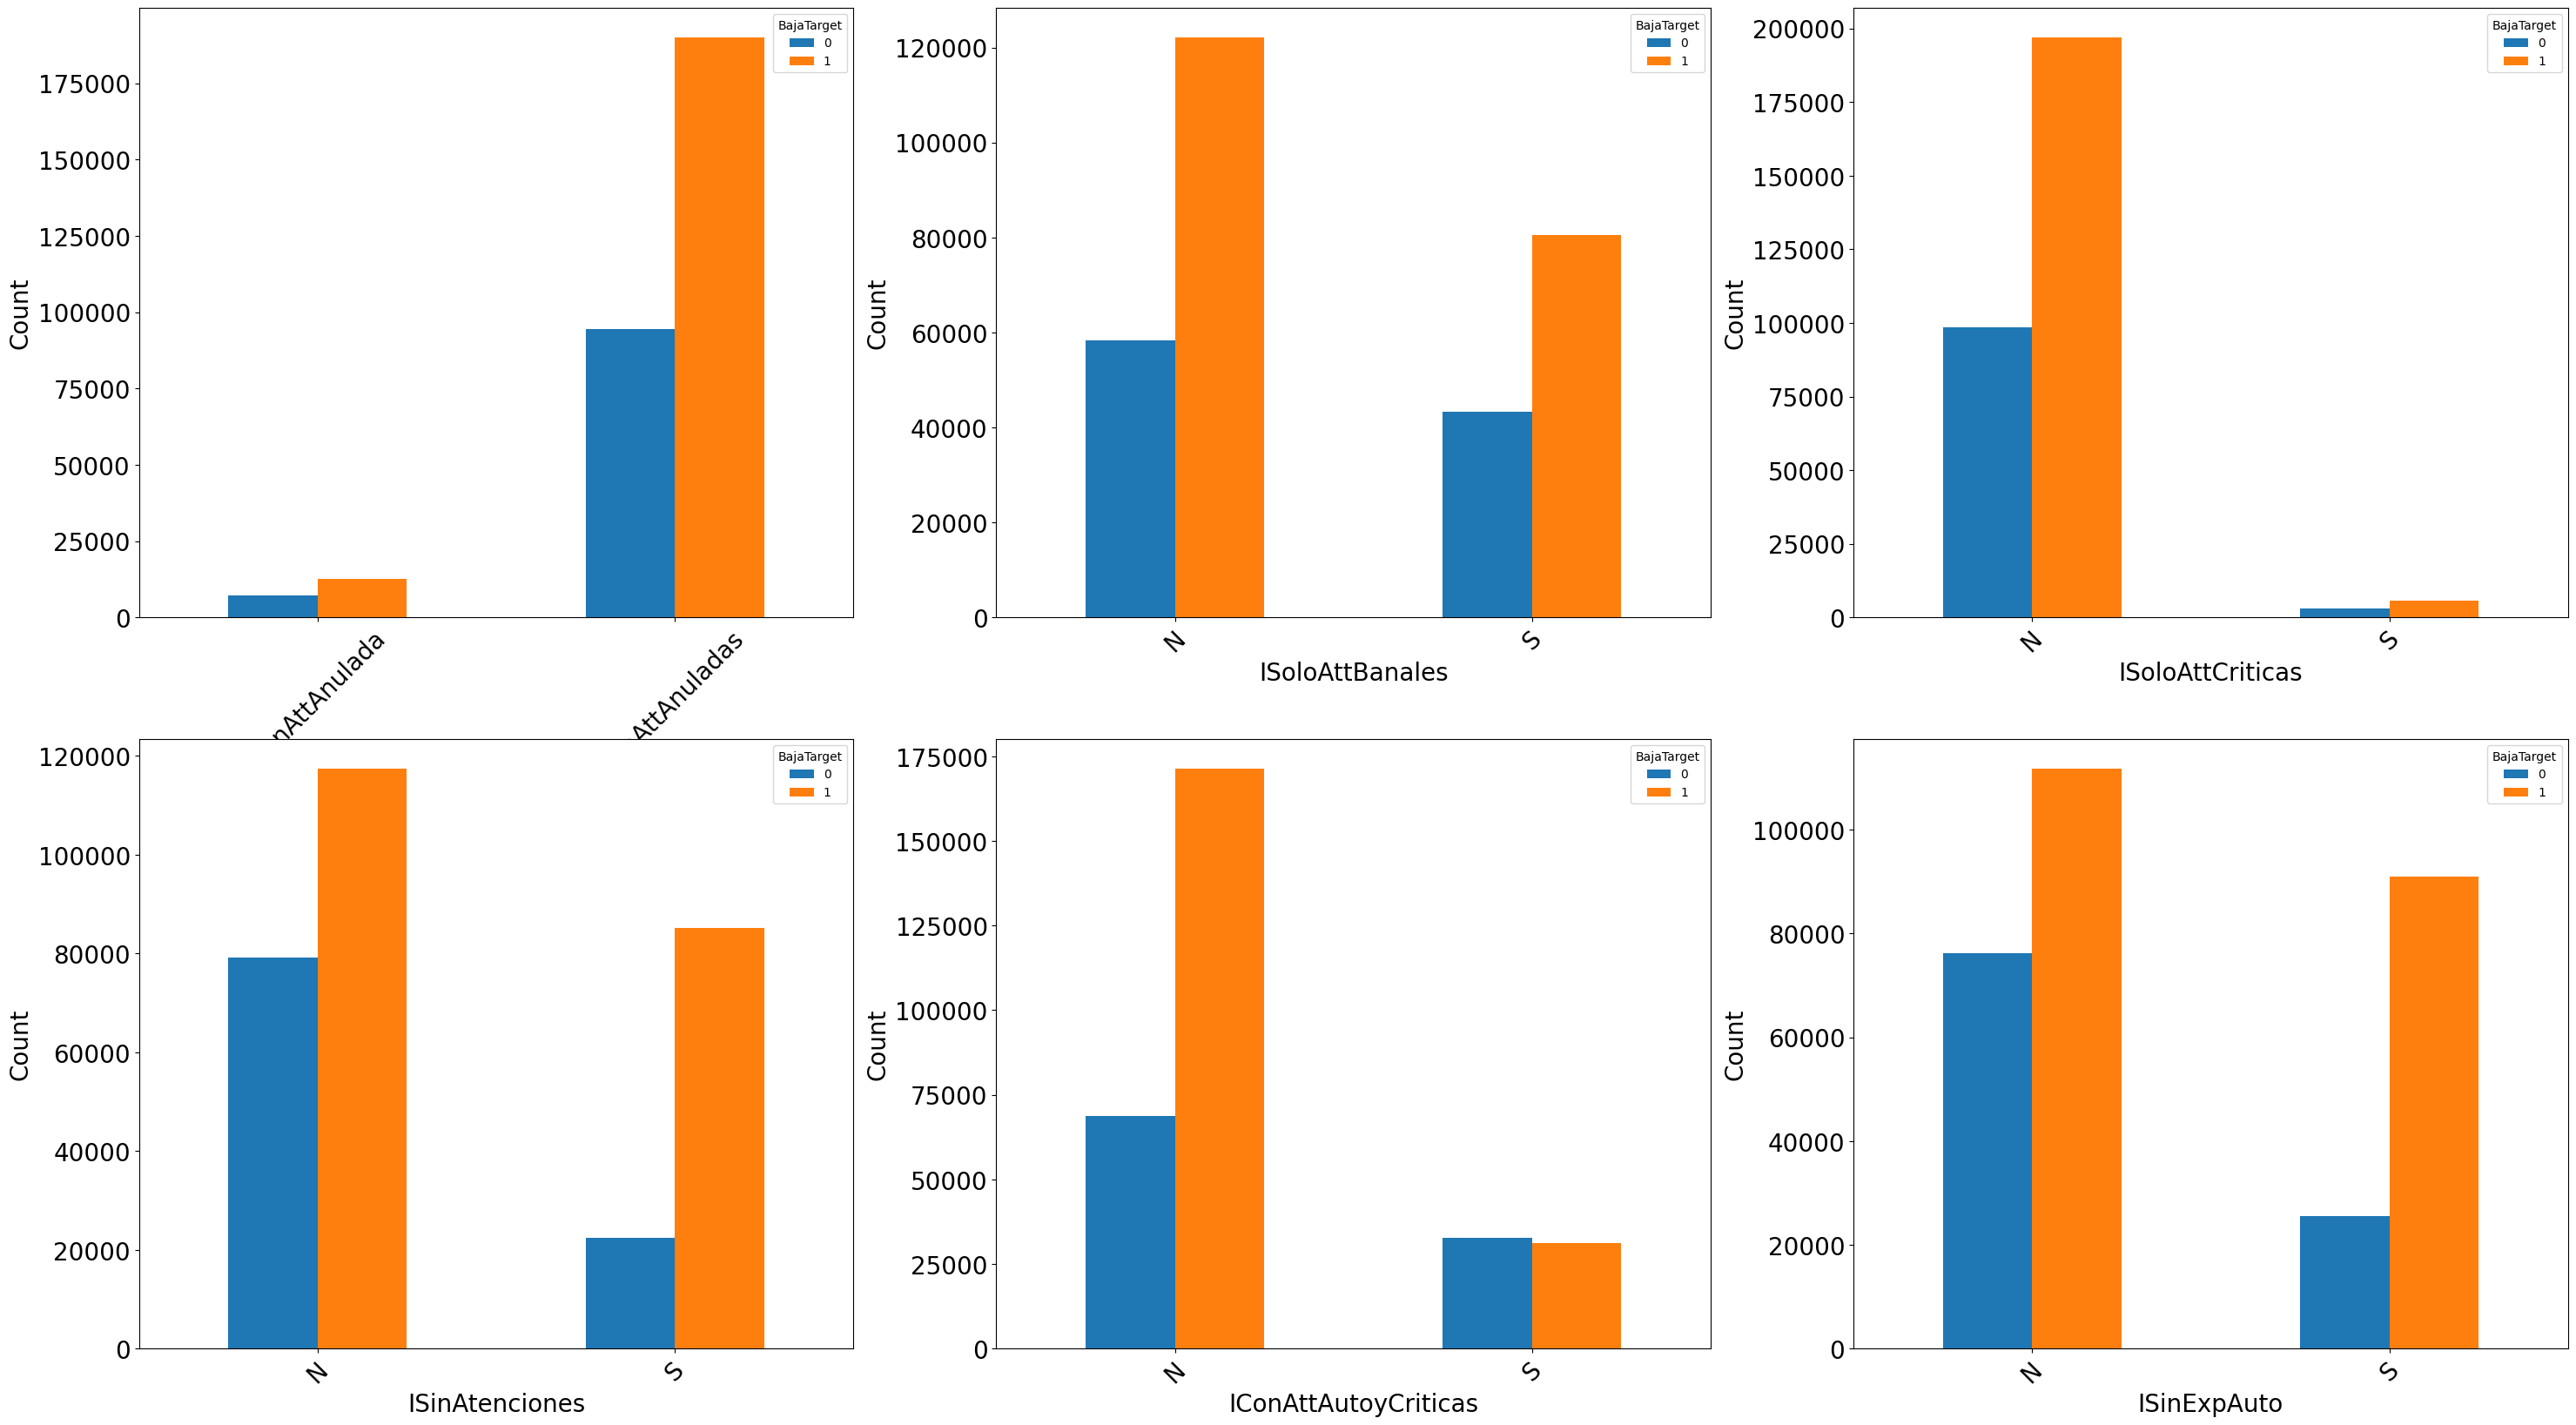

In [25]:
categorical_feature_func(cat_cols[6:12], 'BajaTarget', df, 3)

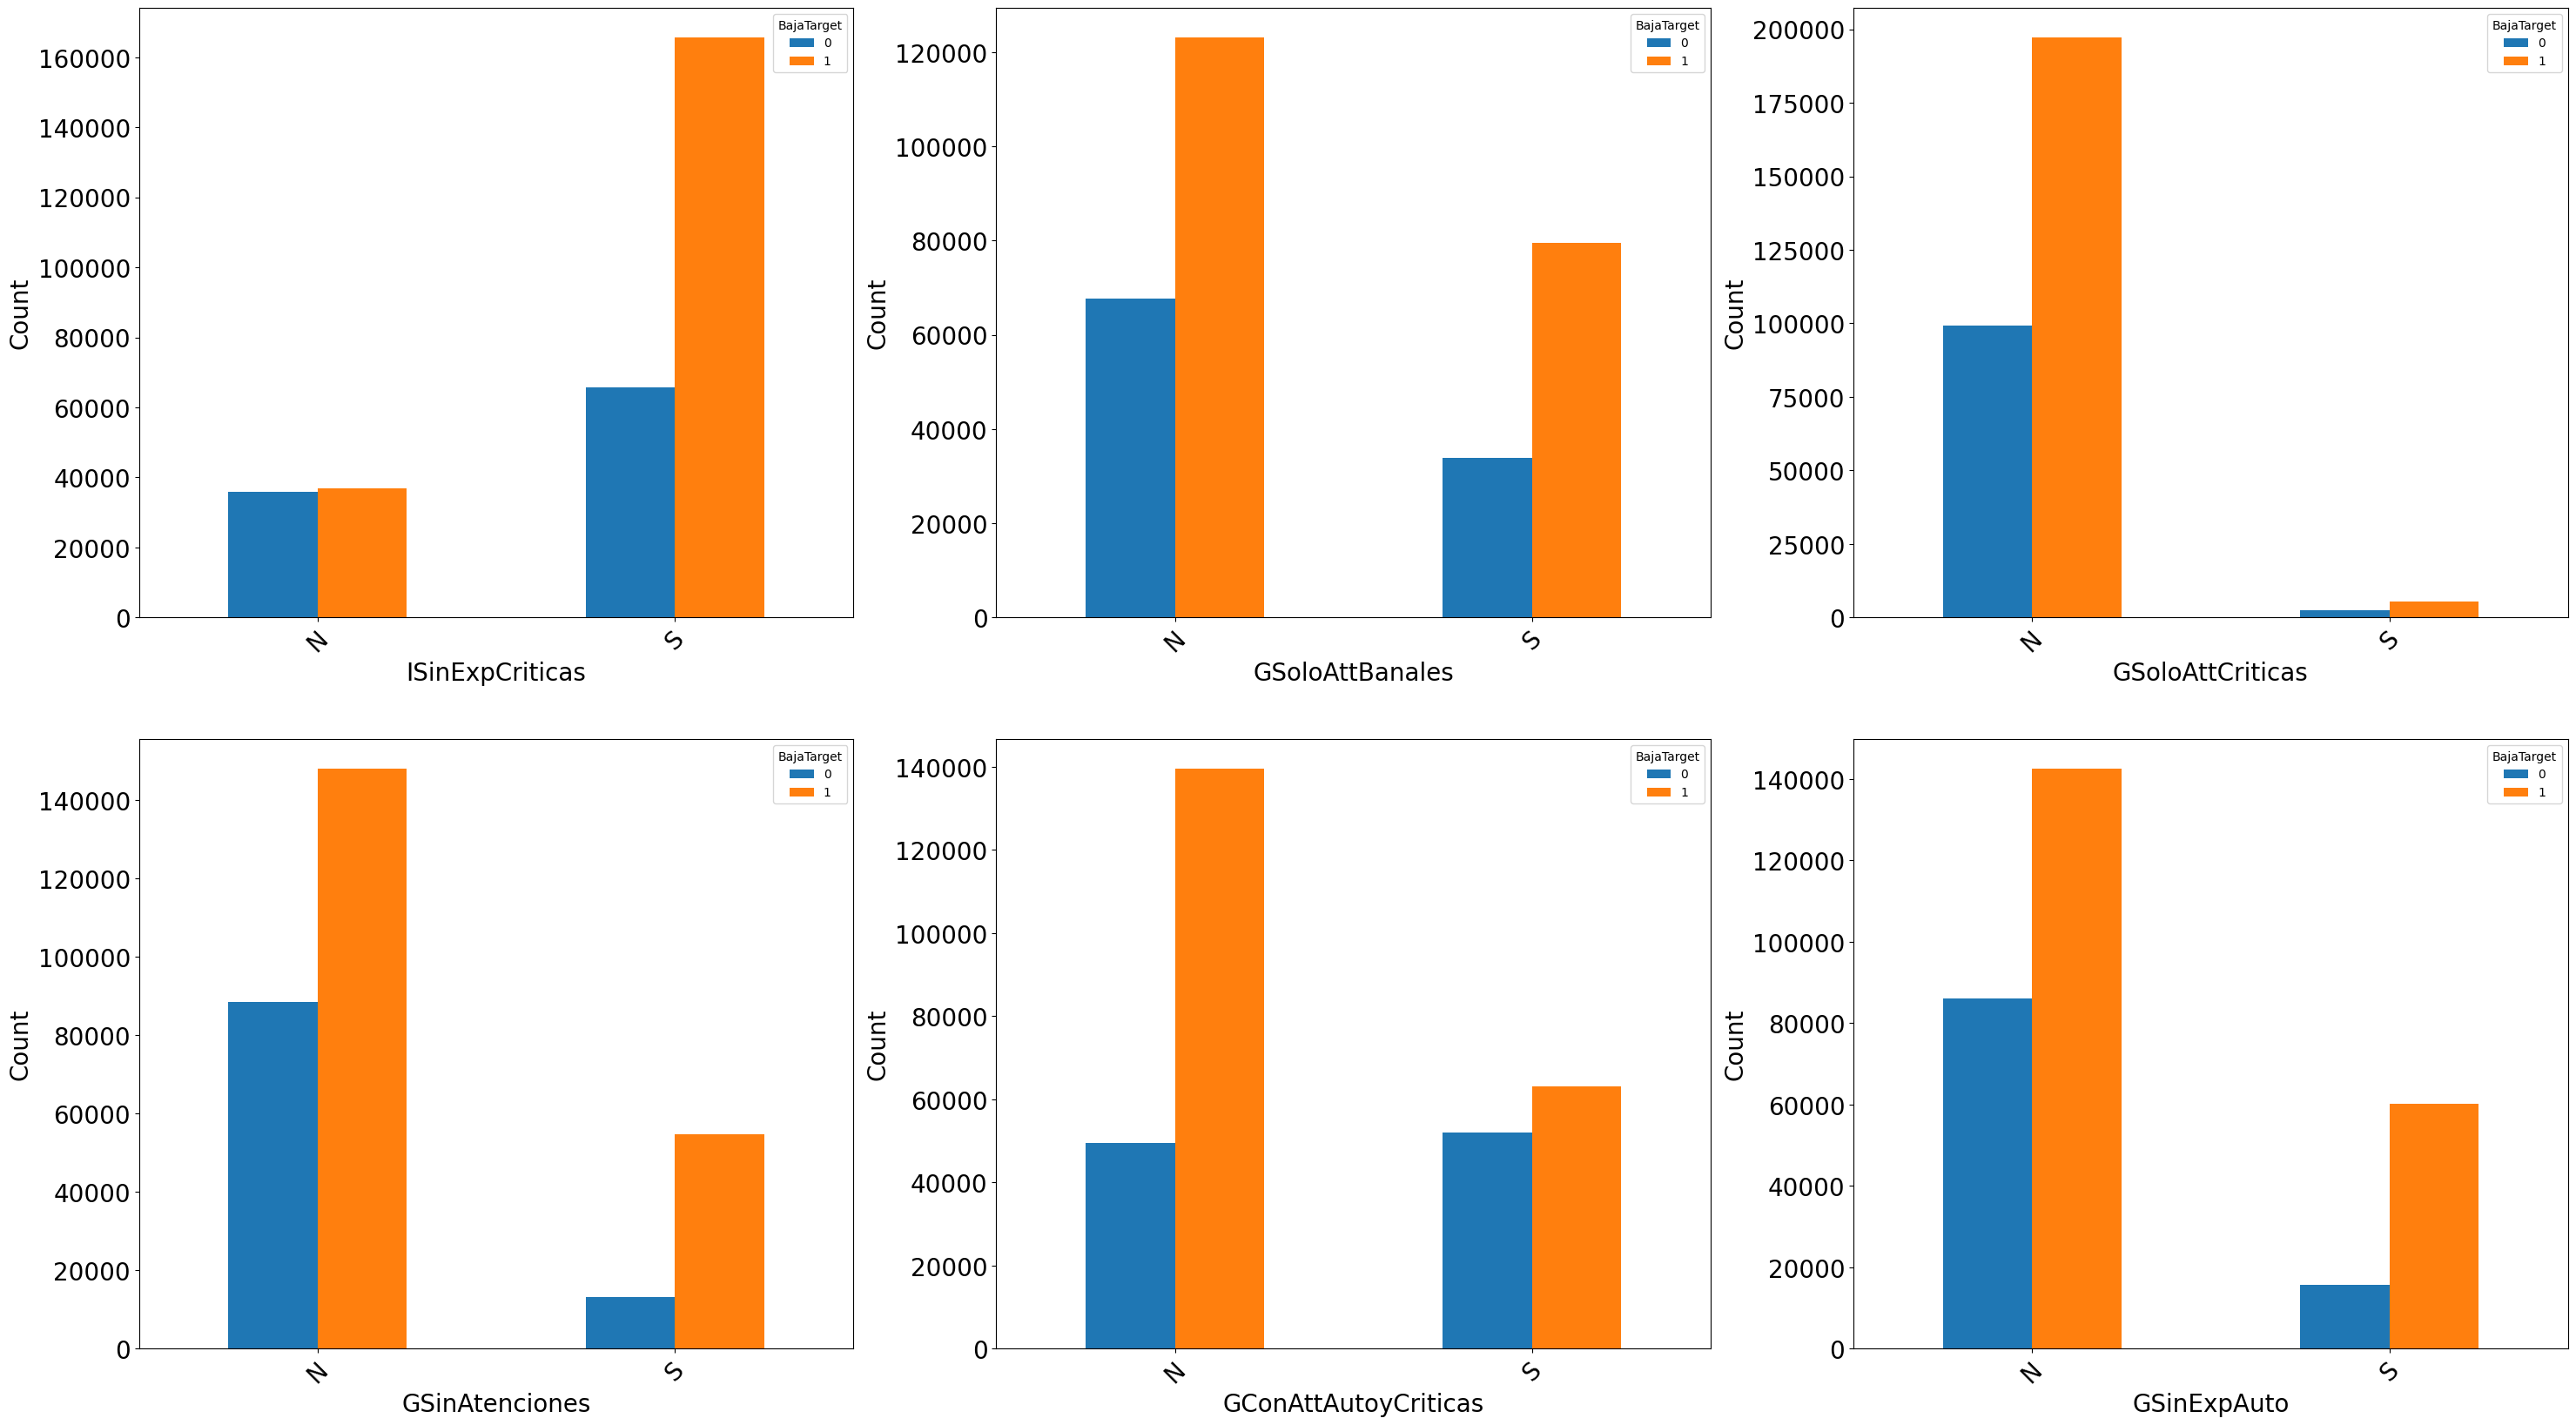

In [26]:
categorical_feature_func(cat_cols[12:18], 'BajaTarget', df, 3)

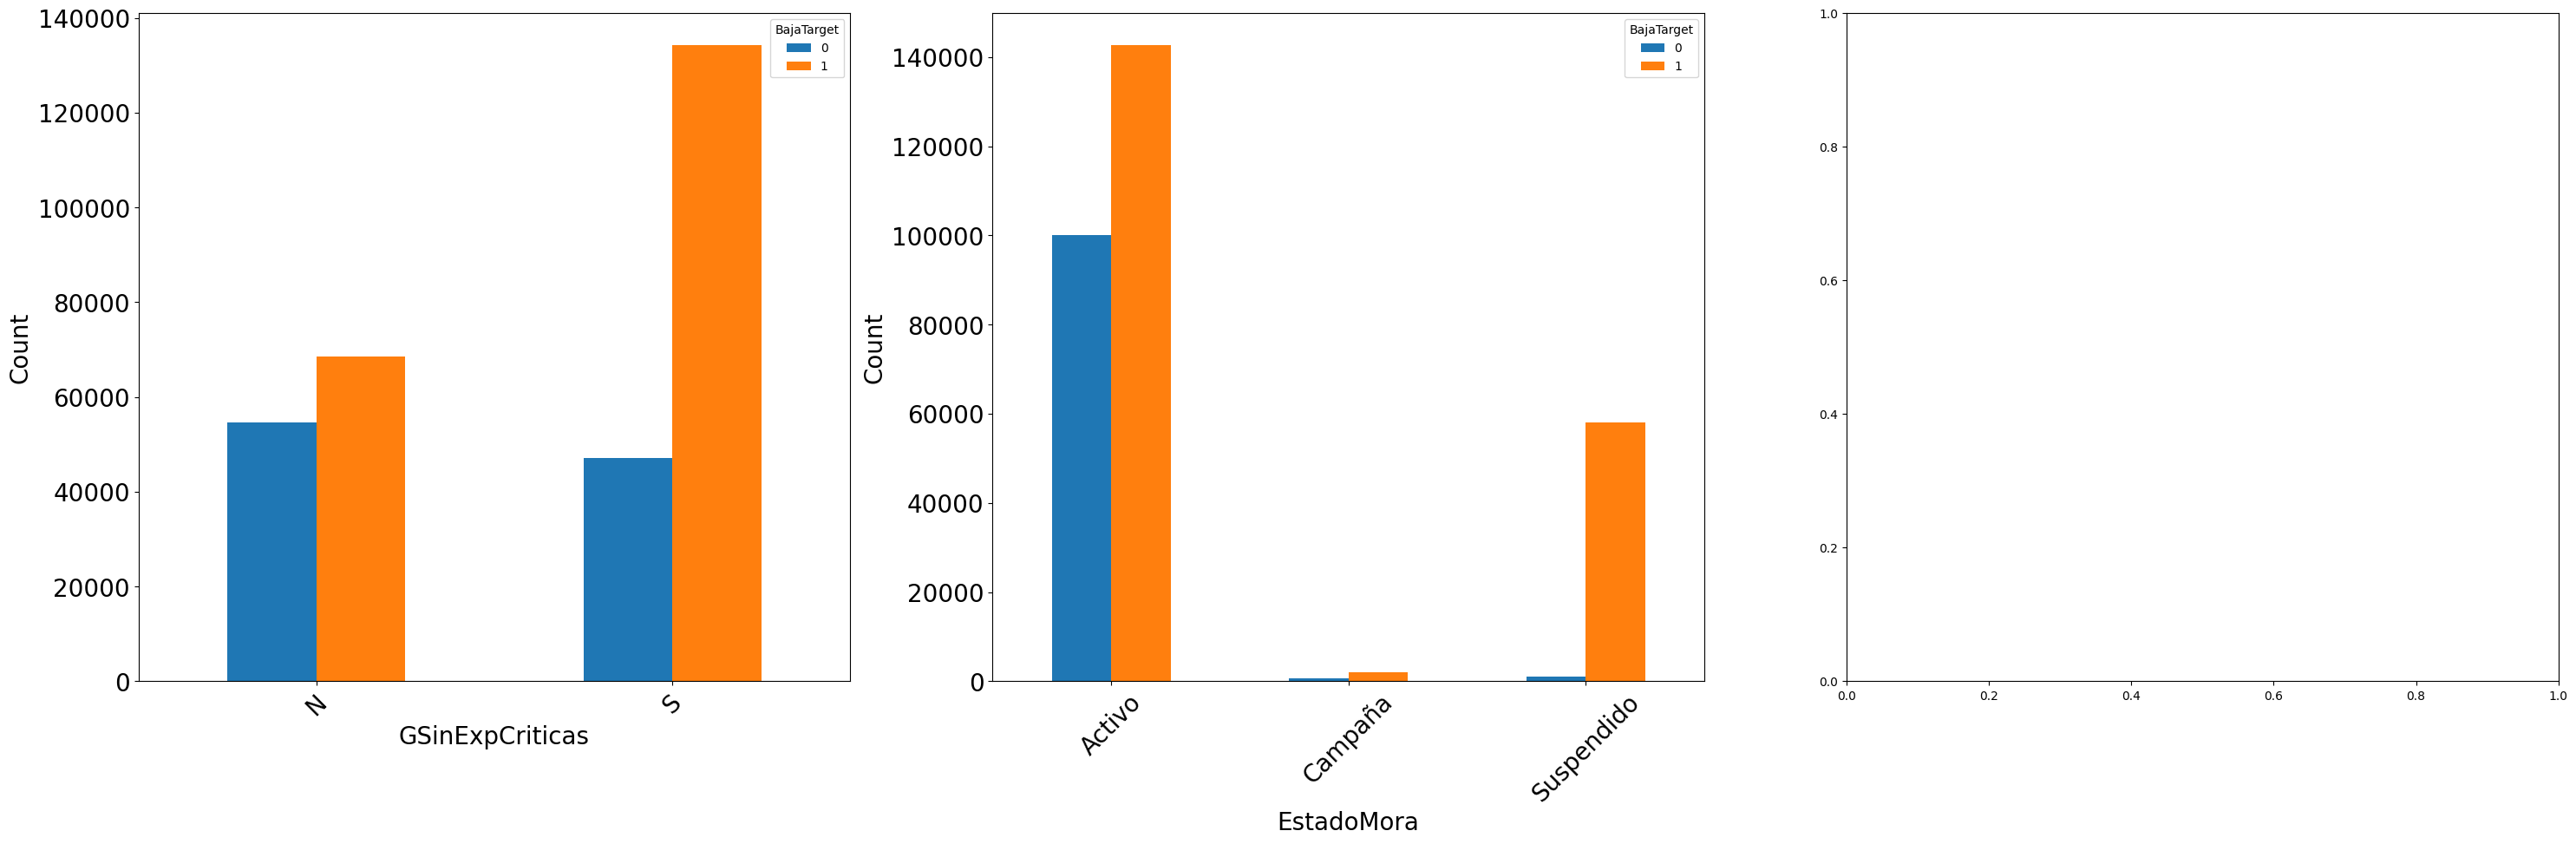

In [27]:
categorical_feature_func(cat_cols[18:], 'BajaTarget', df, 3)

##### 2.2.2 Variables Numéricas

In [28]:
# Univariate visualization of numerical features
def numeric_features_func(num_cols, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.histplot(x=col,data=data, kde=True, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.histplot(x=col,data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('Count', fontsize=20)
    plt.tight_layout()
    

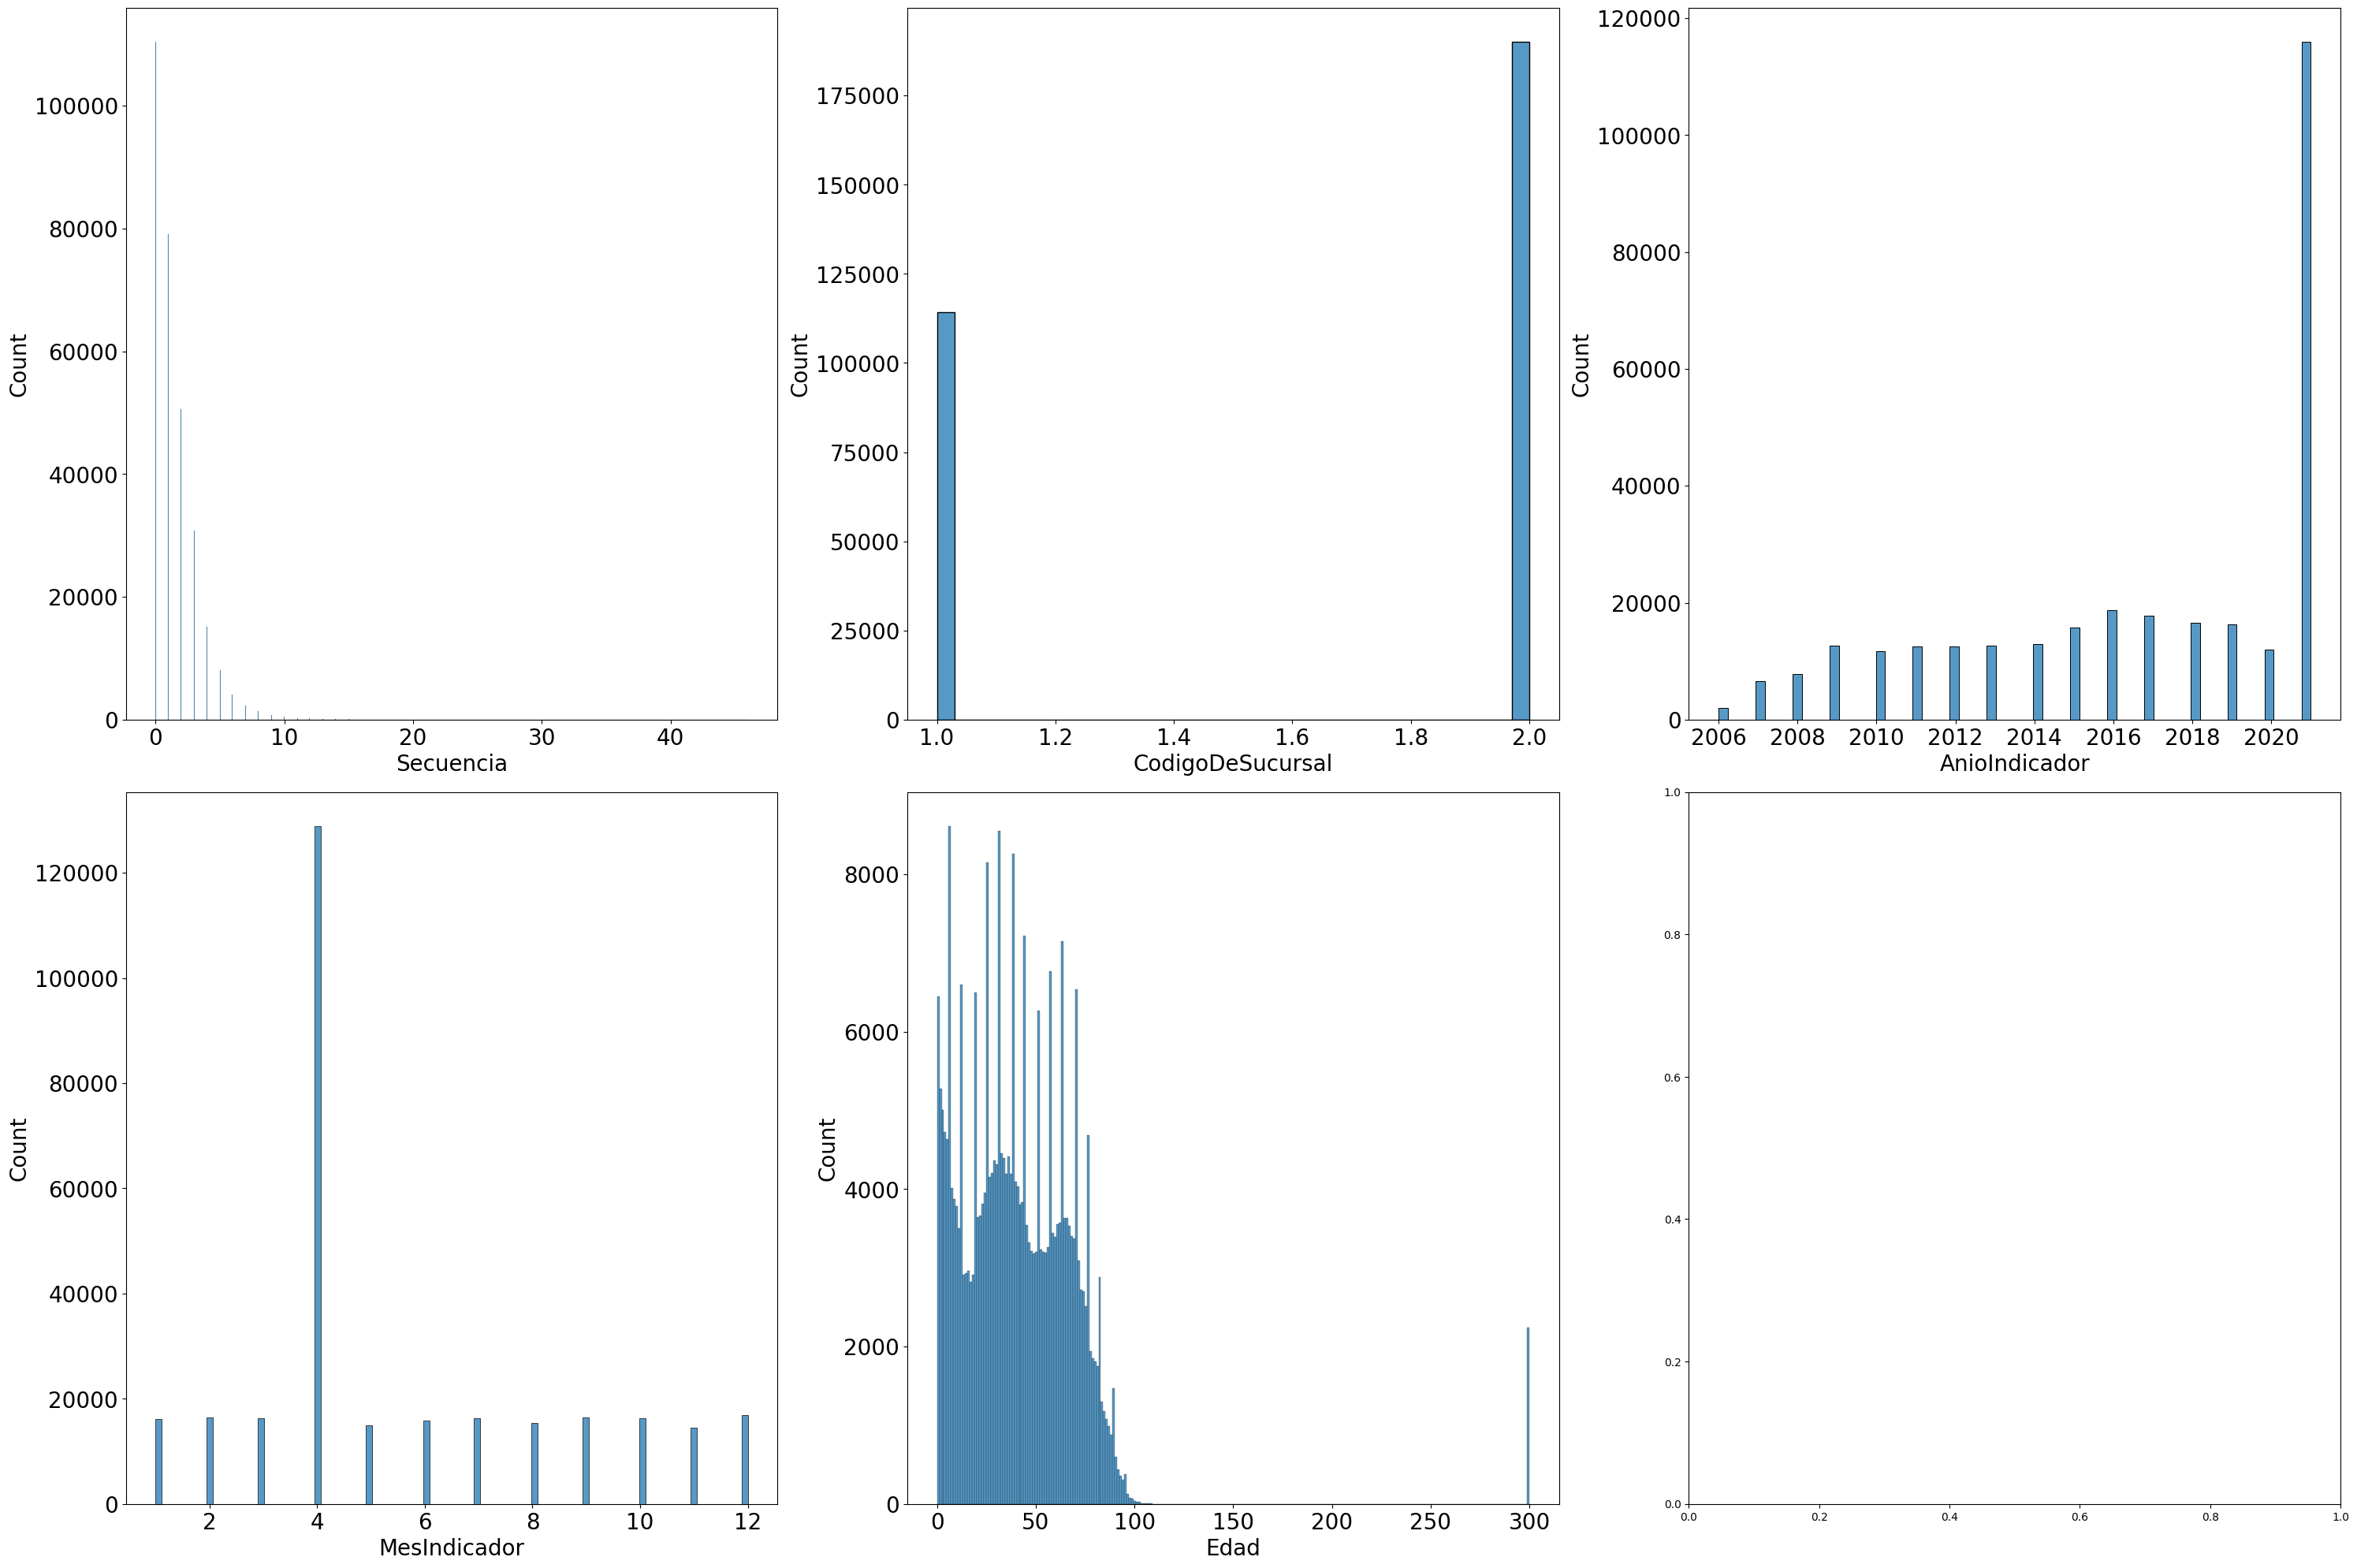

In [29]:
numeric_features_func(num_cols[0:5], df, 3)

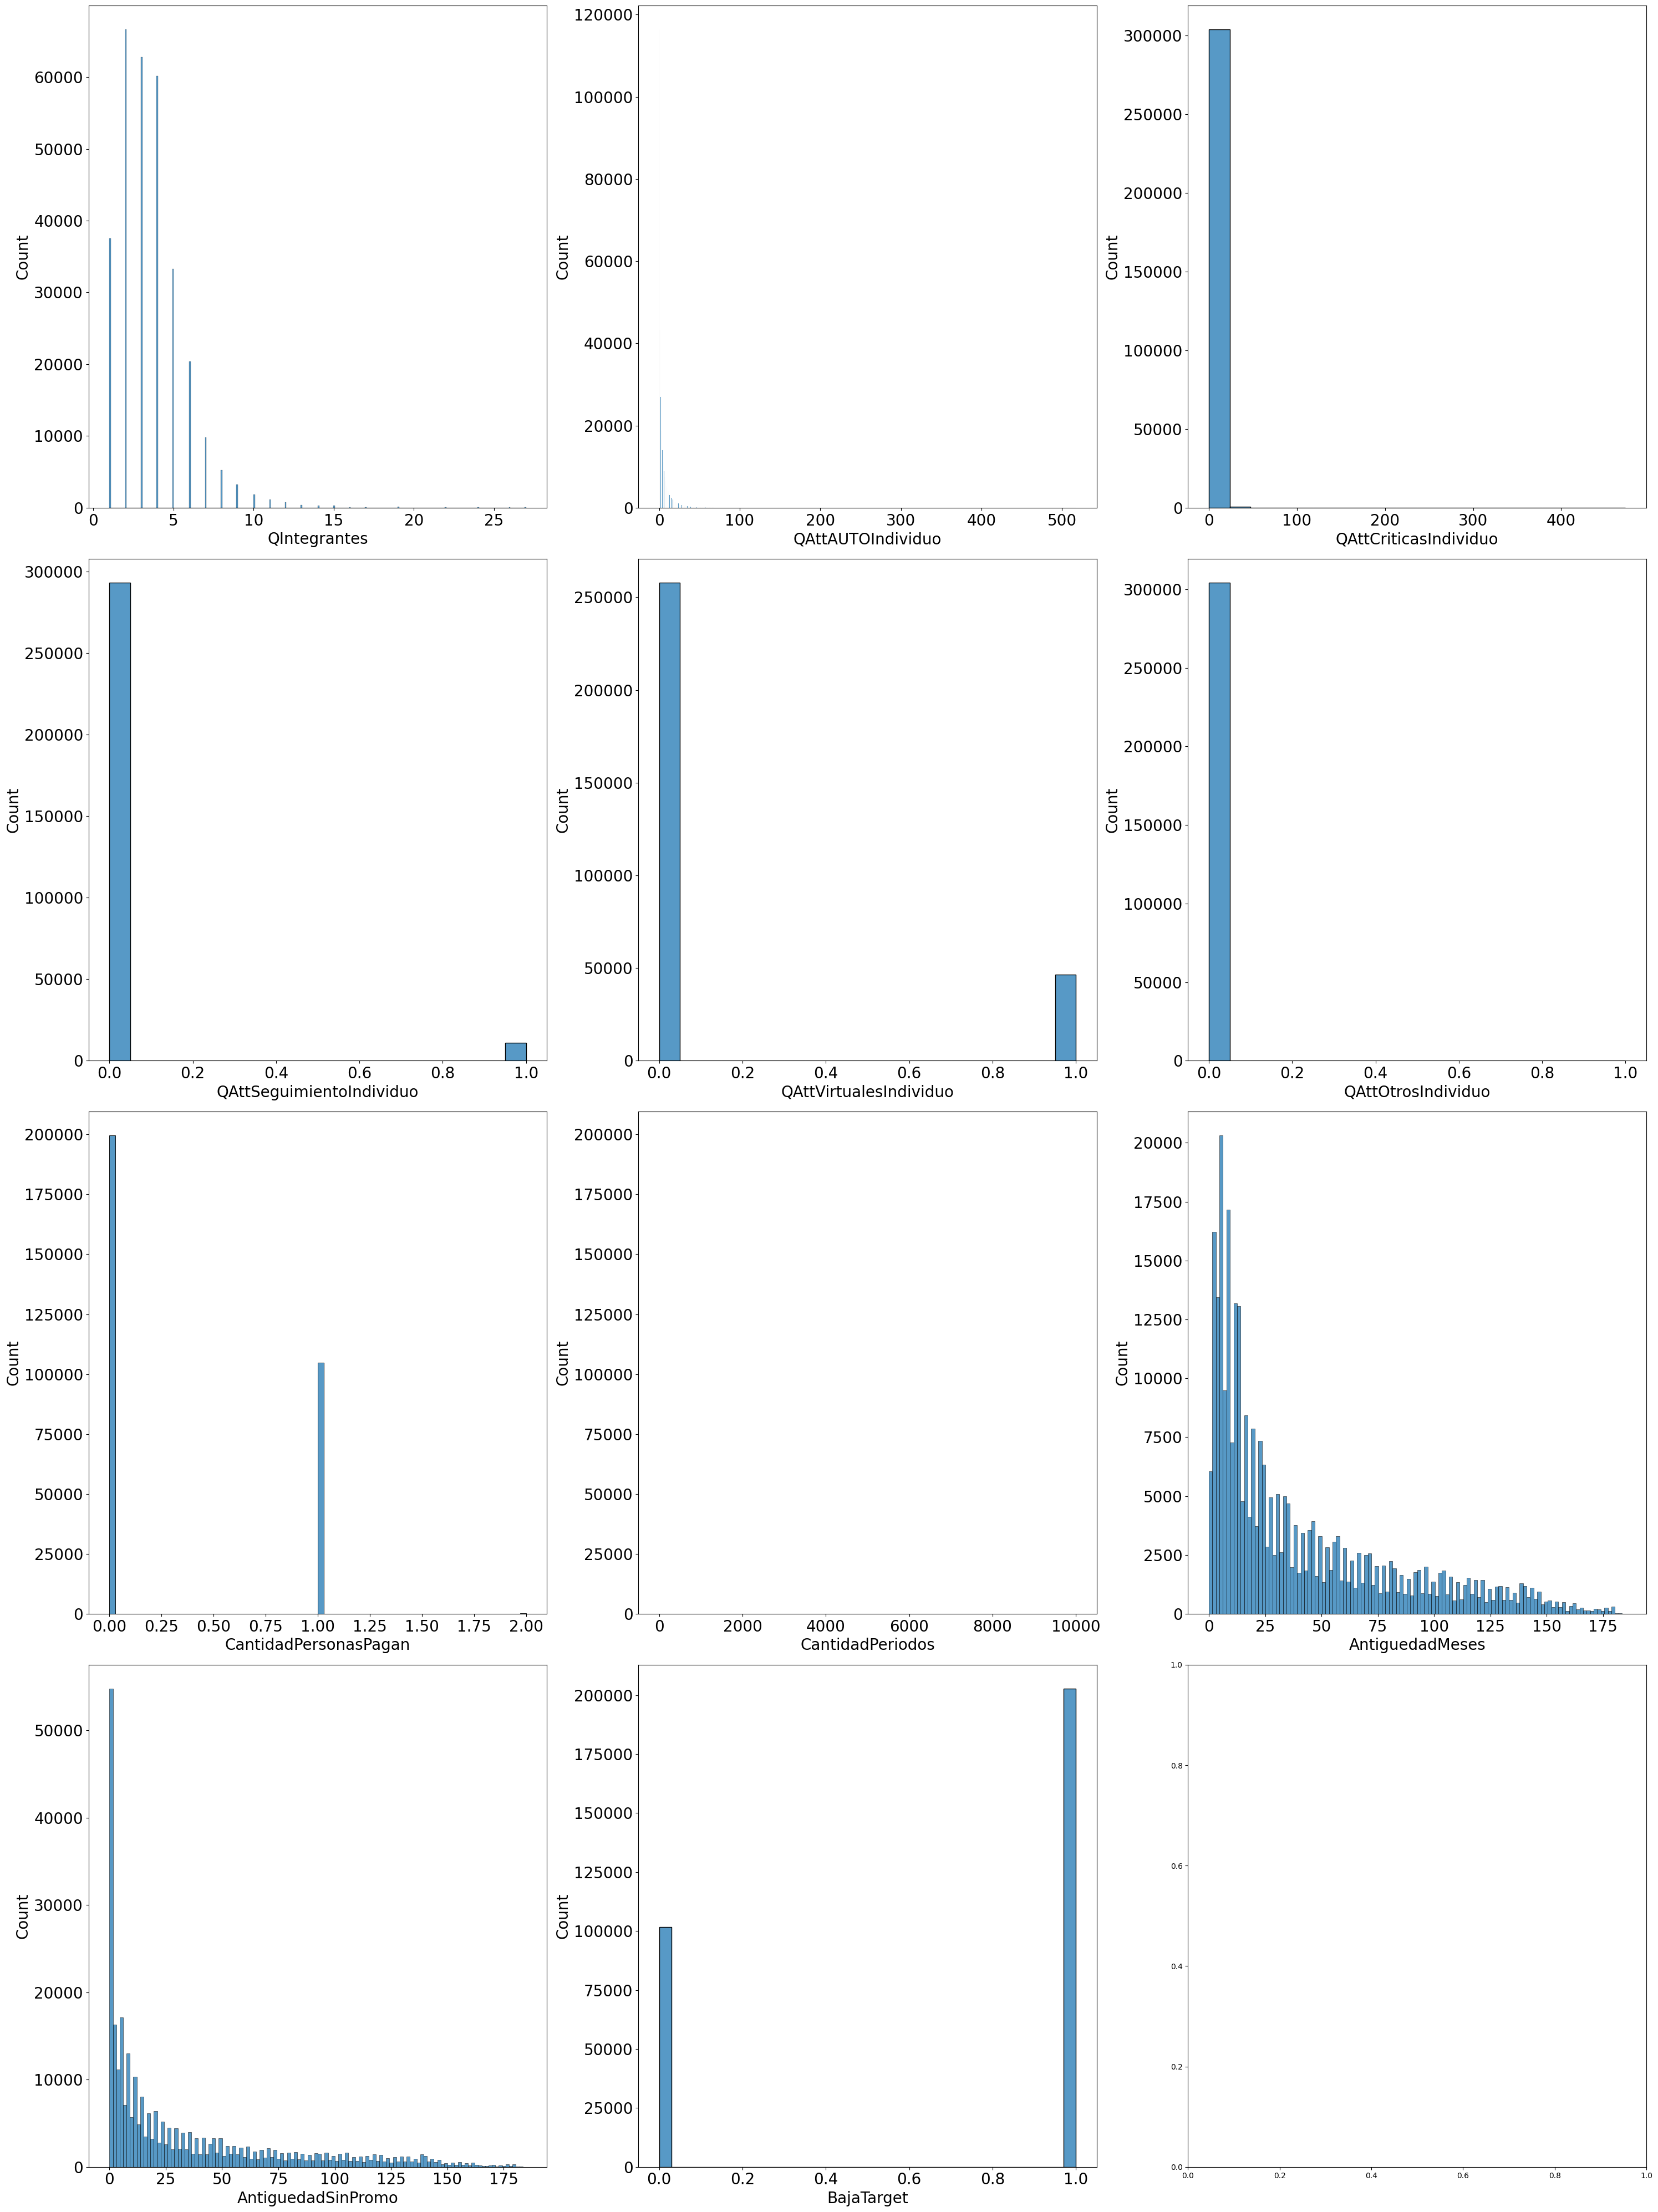

In [30]:
numeric_features_func(num_cols[5:], df, 3)

In [31]:
#Visualización bivariada de características numéricas
#relación entre cada variable numérica en el conjunto de datos y la variable objetivo (BajaTarget) de interés.

def numeric_features_func(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.boxplot(palette='Blues', x=x_col, y=col, data=data, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    



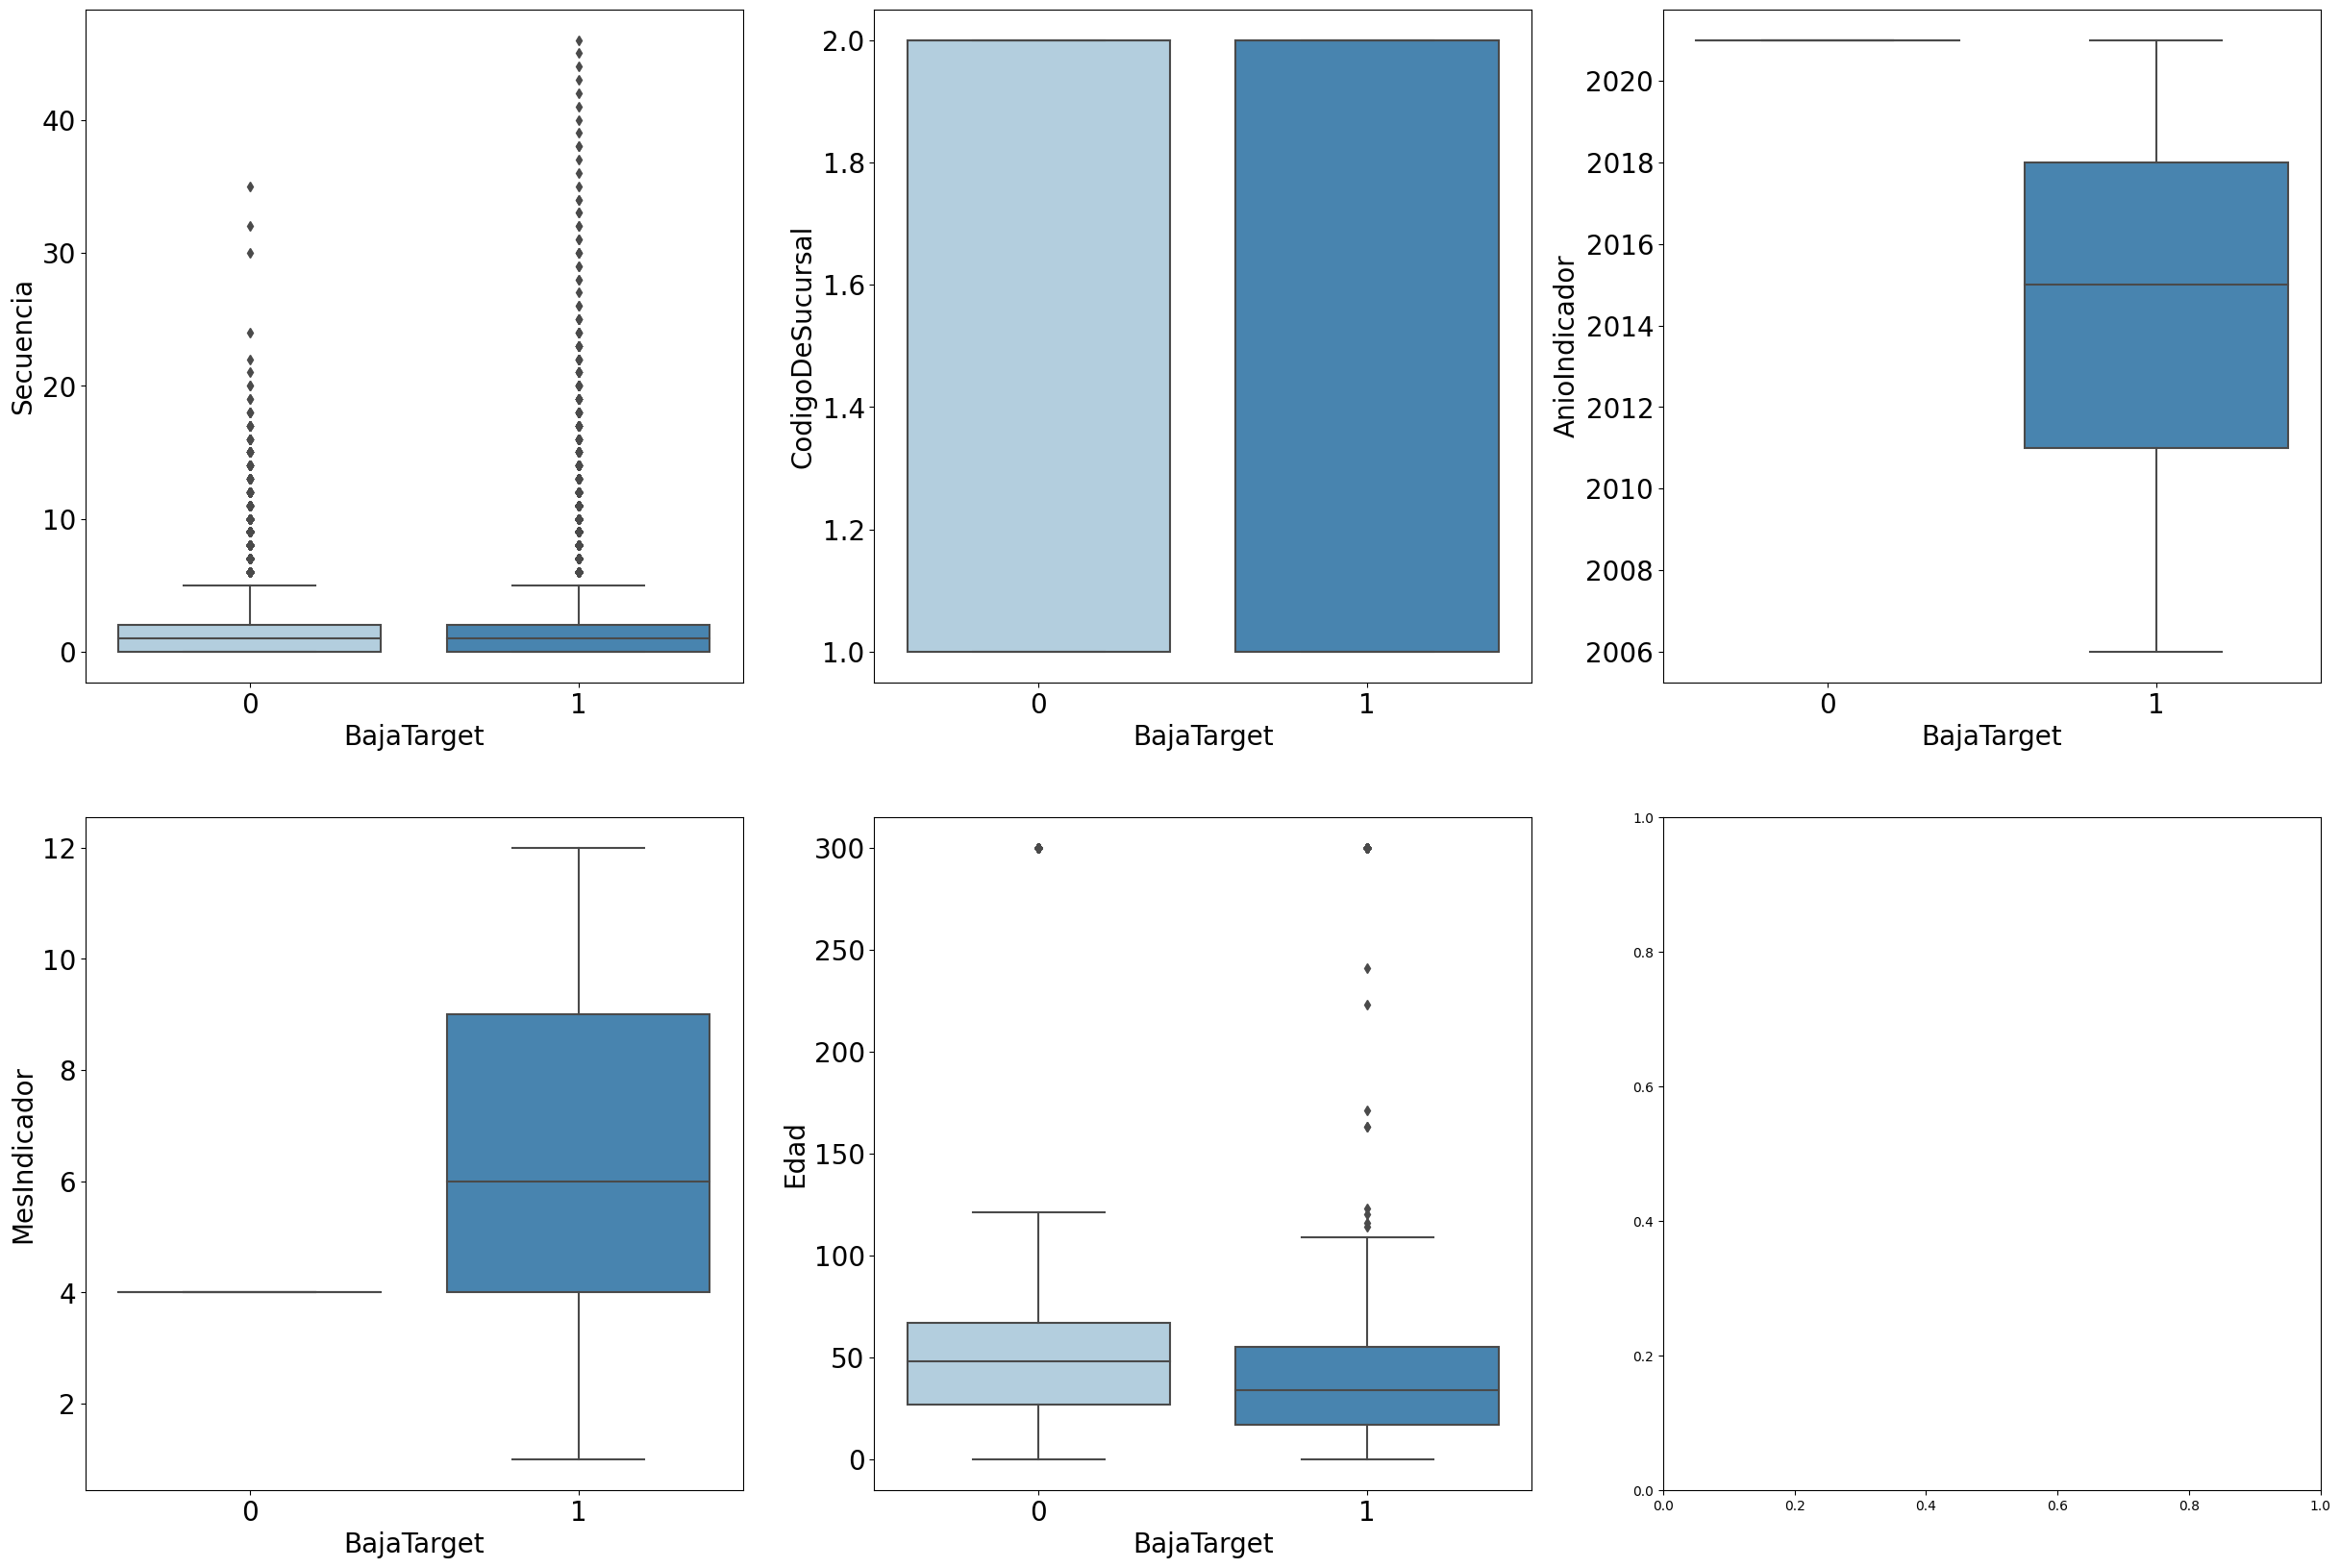

In [32]:
numeric_features_func(num_cols[0:5], 'BajaTarget' , df, 3)

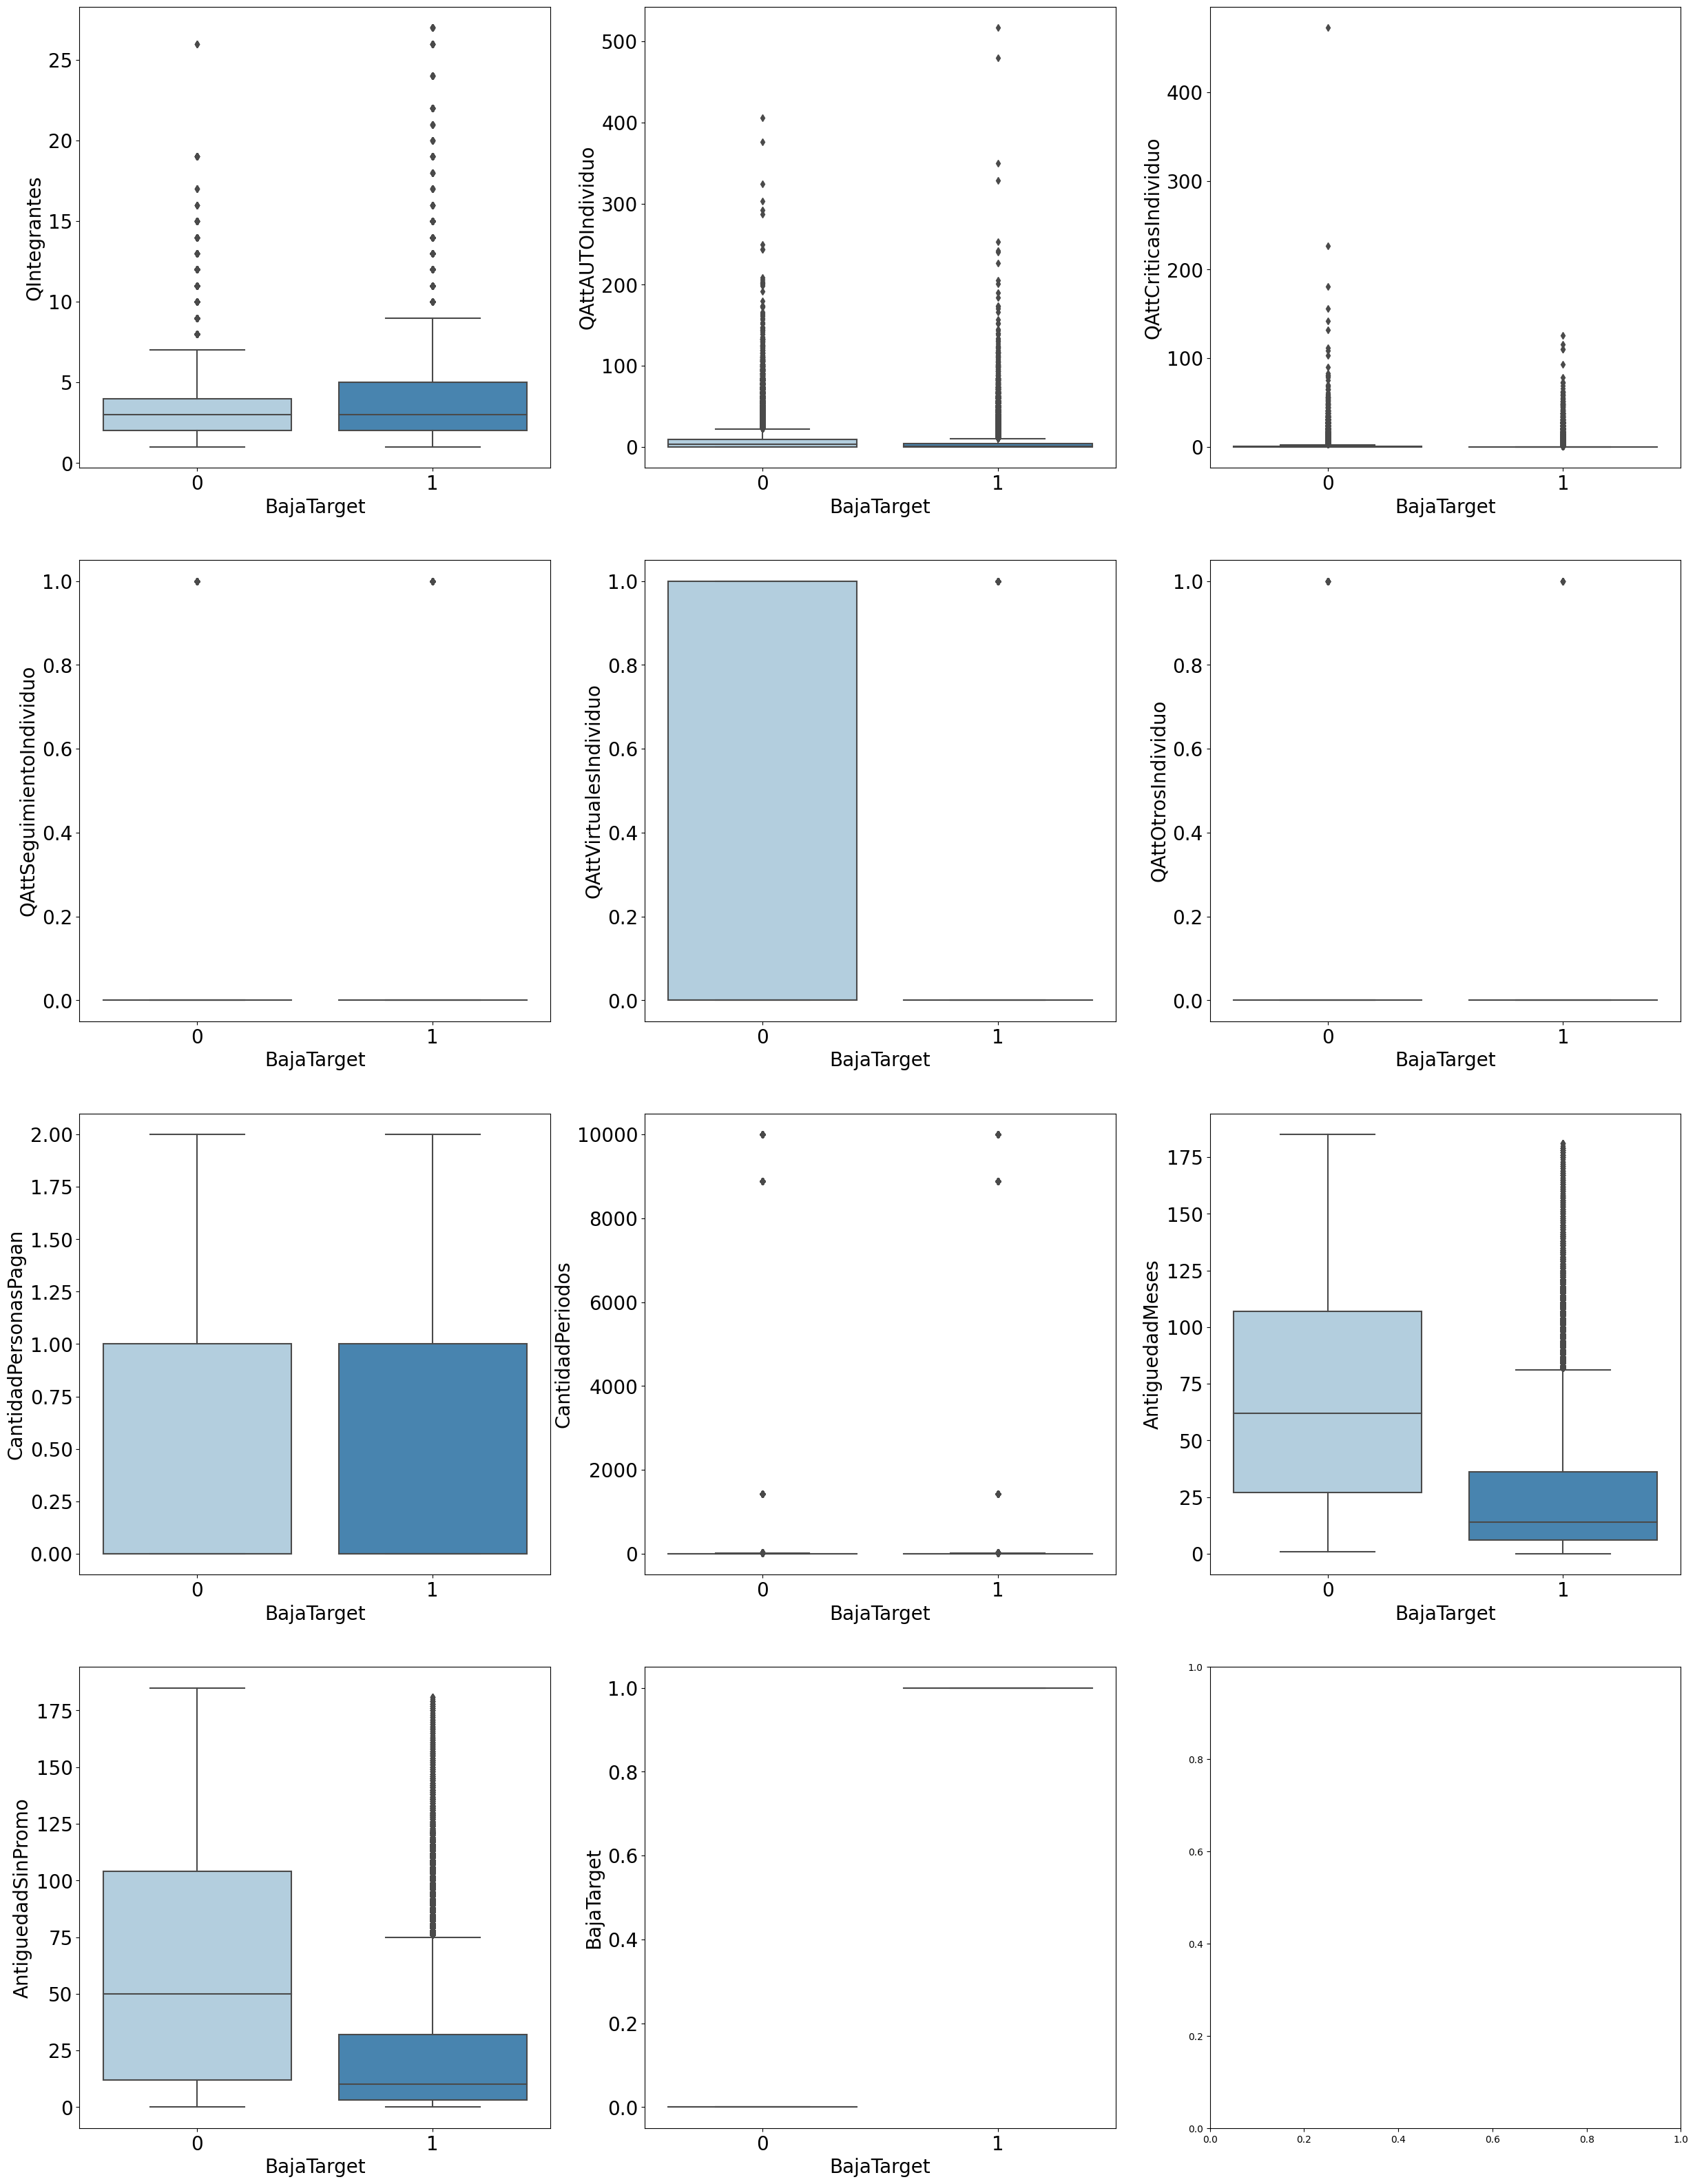

In [33]:
numeric_features_func(num_cols[5:], 'BajaTarget' , df, 3)

# 3. Preprocesamiento

### 3.1 Outliers

In [42]:
import math

In [43]:
df['Edad'] = np.where(df['Edad']>100,math.ceil(df['Edad'].mean()),df['Edad'])

In [44]:
df['CantidadPeriodos'] = np.where(df['CantidadPeriodos']>100,math.ceil(df['CantidadPeriodos'].median()),df['CantidadPeriodos'])

In [45]:
df['CantidadPeriodos'].unique()

array([ 0,  6,  3,  4,  2,  5, 12,  1,  8, 24,  9, 18, 15], dtype=int64)

In [46]:
df.describe().T

count         mean        std     min     25%  \
Secuencia                 127305.0     1.469895   1.815586     0.0     0.0   
CodigoDeSucursal          127305.0     1.555697   0.496890     1.0     1.0   
AnioIndicador             127305.0  2021.917882   0.274545  2021.0  2022.0   
MesIndicador              127305.0     2.532925   1.929792     1.0     2.0   
Edad                      127305.0    45.917929  24.615590     0.0    26.0   
QIntegrantes              127305.0     3.492047   2.003418     1.0     2.0   
QAttAUTOIndividuo         127305.0     6.494835  11.765311     0.0     0.0   
QAttCriticasIndividuo     127305.0     0.989411   3.440928     0.0     0.0   
QAttSeguimientoIndividuo  127305.0     0.085896   0.280212     0.0     0.0   
QAttVirtualesIndividuo    127305.0     0.366977   0.481982     0.0     0.0   
QAttOtrosIndividuo        127305.0     0.000660   0.025679     0.0     0.0   
CantidadPersonasPagan     127305.0     0.343969   0.476255     0.0     0.0   
CantidadPeriodos          127305.0     1.134747   2.650569     0.0     0.0   
AntiguedadMeses           127305.0    67.451192  50.237707     1.0    23.0   
AntiguedadSinPromo        127305.0    59.266745  53.445114     0.0    11.0   
BajaTarget                127305.0     0.106681   0.308708     0.0     0.0   

                             50%     75%     max  
Secuencia                    1.0     2.0    35.0  
CodigoDeSucursal             2.0     2.0     2.0  
AnioIndicador             2022.0  2022.0  2022.0  
MesIndicador                 2.0     2.0    12.0  
Edad                        47.0    66.0   100.0  
QIntegrantes                 3.0     4.0    28.0  
QAttAUTOIndividuo            2.0     8.0   406.0  
QAttCriticasIndividuo        0.0     1.0   473.0  
QAttSeguimientoIndividuo     0.0     0.0     1.0  
QAttVirtualesIndividuo       0.0     1.0     1.0  
QAttOtrosIndividuo           0.0     0.0     1.0  
CantidadPersonasPagan        0.0     1.0     2.0  
CantidadPeriodos             0.0     0.0    24.0  
AntiguedadMeses             58.0   107.0   195.0  
AntiguedadSinPromo          44.0   104.0   195.0  
BajaTarget                   0.0     0.0     1.0

In [47]:
y = df['BajaTarget']
df=df.drop(columns=['BajaTarget'])
df.head()

Secuencia  CodigoDeSucursal                  NombreAfiliado  AnioIndicador  \
0          2                 1  AGUSTIN ADRIAN                           2022   
1          1                 2  AZUCENA DEL ROSARIO                      2022   
2          2                 2  MARIA CRISTINA                           2022   
3          2                 2  ORLANDO ENRIQUE                          2022   
4          2                 1  DAMIAN                                   2022   

   MesIndicador TipoAfiliacion DescripcionDeSexo EstadoMesIndicadores  \
0             2     Voluntario         Masculino               Activo   
1             2     Individual          Femenino               Activo   
2             2     Individual          Femenino               Activo   
3             2     Individual         Masculino               Activo   
4             2     Voluntario         Masculino               Activo   

                     Convenio DescripcionDeTipoDePago  ... ISinExpCriticas  \
0  MUTUAL PERSONAL LA SEGUNDA                Convenio  ...               S   
1                 SinConvenio         Débito bancario  ...               N   
2                 SinConvenio          Débito tarjeta  ...               S   
3                 SinConvenio          Débito tarjeta  ...               N   
4             MUTUAL LEY 5110                Convenio  ...               S   

  GSoloAttBanales GSoloAttCriticas  GSinAtenciones  GConAttAutoyCriticas  \
0               N                N               N                     S   
1               N                N               N                     S   
2               N                N               S                     N   
3               N                N               N                     S   
4               S                N               N                     N   

   GSinExpAuto  GSinExpCriticas  AntiguedadMeses  AntiguedadSinPromo  \
0            N                N               77                  77   
1            N                N              184                 184   
2            S                S               77                   0   
3            N                N               77                   0   
4            N                S               43                  43   

   EstadoMora  
0      Activo  
1      Activo  
2      Activo  
3      Activo  
4      Activo  

[5 rows x 37 columns]

In [48]:
y

0         0
1         0
2         0
3         0
4         0
         ..
127300    0
127301    0
127302    0
127303    0
127304    1
Name: BajaTarget, Length: 127305, dtype: int64

### 3.2 Encoding

In [49]:
### Hacer todas las transaformaciones necesarias juntas con ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from pickle import load


In [50]:
le = load(open('le.pkl','rb'))

In [51]:
#Como sabemos si se aplica el mismo encoder a Test, es decir que le de el mismo codigo a las mismas descripciones

#le=LabelEncoder()
le.transform(df['Convenio'])
#df['DescripcionDeInstitucionDeCobro']=le.transform(df['DescripcionDeInstitucionDeCobro'])


ValueError: y contains previously unseen labels: 'AMR MUTUAL KINESIOLOGO'

In [30]:
df['Convenio']

0         118
1         141
2         141
3         141
4         114
         ... 
127300    141
127301    141
127302    141
127303     58
127304    141
Name: Convenio, Length: 127305, dtype: int32

In [43]:


# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las columnas cualitativas
# Para mantener las columnas a las que no se les aplica ninguna transformación se tiene que indicar remainder='passthrough'.
num_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

label_cols = df[['Convenio', 'DescripcionDeInstitucionDeCobro']].columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns


sublist=[x for x in cat_cols if x not in label_cols]
cat_cols=df[sublist].columns



preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), num_cols),
                    ('onehot', OneHotEncoder(drop='first'), cat_cols)
                    ],
                    remainder='passthrough')

In [44]:
data_prep = preprocessor.fit_transform(df)
#data_prep=data_prep.toarray() 

In [45]:
data_prep.shape

(304337, 42)

In [46]:
# Convertir el output en dataframe y añadir el nombre de las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([num_cols, encoded_cat])

data = pd.DataFrame(data_prep, columns=labels)

data.head()

Secuencia  CodigoDeSucursal  AnioIndicador  MesIndicador  Convenio  \
0  -0.265449          0.775007       0.943990     -0.520889  0.598617   
1  -0.265449          0.775007       0.943990     -0.520889  0.743549   
2  -0.265449          0.775007      -1.736484      1.144561  0.598617   
3  -0.812424          0.775007      -1.736484     -1.520159  0.611792   
4  -0.812424         -1.290310       0.943990     -0.520889 -2.392271   

   DescripcionDeInstitucionDeCobro      Edad  QIntegrantes  QAttAUTOIndividuo  \
0                        -0.670884 -0.528246     -0.744870           0.547066   
1                        -0.670884  1.452727     -0.275593          -0.498434   
2                        -0.670884 -0.363165      0.193683          -0.498434   
3                         1.458099  0.586052     -0.744870          -0.498434   
4                        -0.670884  1.205106     -0.275593          -0.289334   

   QAttCriticasIndividuo  ...  ISinExpAuto_S  ISinExpCriticas_S  \
0               0.471662  ...            0.0                0.0   
1               0.108451  ...            1.0                0.0   
2              -0.254760  ...            1.0                1.0   
3              -0.254760  ...            1.0                1.0   
4              -0.254760  ...            0.0                1.0   

   GSoloAttBanales_S  GSoloAttCriticas_S  GSinAtenciones_S  \
0                0.0                 0.0               0.0   
1                0.0                 1.0               0.0   
2                1.0                 0.0               0.0   
3                0.0                 0.0               1.0   
4                0.0                 0.0               0.0   

   GConAttAutoyCriticas_S  GSinExpAuto_S  GSinExpCriticas_S  \
0                     1.0            0.0                0.0   
1                     0.0            1.0                0.0   
2                     0.0            0.0                1.0   
3                     0.0            1.0                1.0   
4                     1.0            0.0                0.0   

   EstadoMora_Campaña  EstadoMora_Suspendido  
0                 0.0                    0.0  
1                 0.0                    0.0  
2                 0.0                    1.0  
3                 0.0                    1.0  
4                 0.0                    0.0  

[5 rows x 42 columns]

### 3.3 PCA - Reduccción Dimensionalidad

In [47]:
from sklearn.decomposition import PCA

In [48]:
#PCA
pca=PCA() 
#Se puede definir la cantidad de componentes Ej:pca=PCA(n_components=3)
#Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
X_pca=pca.fit_transform(data) 

In [49]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.17667574 0.29144688 0.37853258 0.44844364 0.50526288 0.55867984
 0.60694653 0.65420021 0.69693289 0.73614233 0.77225631 0.80605966
 0.83616494 0.86193342 0.88621461 0.90789605 0.92704243 0.94007923
 0.9519652  0.96344793 0.97120539 0.97822003 0.98420338 0.9882439
 0.99093945 0.99343563 0.99531171 0.99684356 0.99824664 0.99923341
 0.99974708 0.99991721 0.99996181 0.99999564 1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [50]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

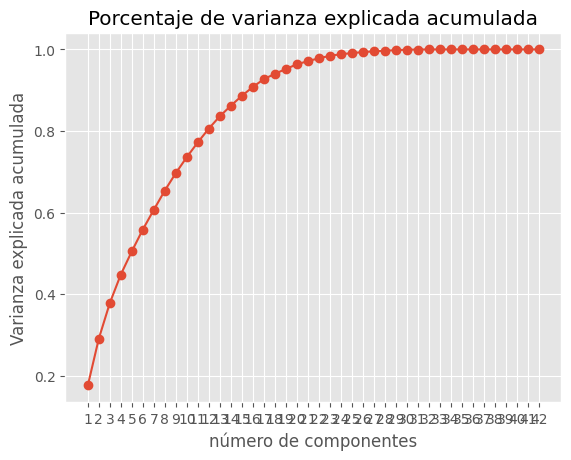

In [51]:
#Grafico varianza explicada acumulada
plt.plot(np.arange(len(data.columns)) + 1,prop_varianza_acum,marker = 'o')
plt.xticks(np.arange(pca.n_components_) + 1)
plt.xlabel('número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Porcentaje de varianza explicada acumulada');

In [52]:

#PCA
pca=PCA(n_components=12) 
X_pca=pca.fit_transform(data) 

In [53]:
X_pca

array([[ 2.98893995,  0.42890472, -0.14941546, ...,  0.48971349,
         0.29004711, -1.23154307],
       [ 0.42074405, -0.10984407, -1.29401446, ...,  0.2944164 ,
        -0.640352  , -0.8571595 ],
       [-1.77286245, -1.4970026 ,  0.07871131, ...,  0.16840282,
         0.07997759, -1.01149845],
       ...,
       [-0.04811589, -2.11781359, -1.7822603 , ..., -1.17136824,
         0.12766174,  0.51427813],
       [ 3.10991646,  2.06420946,  0.05909079, ..., -1.06836063,
        -0.23717175,  0.72480404],
       [ 0.4305868 , -1.73021288, -1.42910119, ..., -1.16107062,
        -1.26392205,  1.28846354]])

In [54]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

Porcentaje de varianza explicada acumulada
[0.17667574 0.29144688 0.37853258 0.44844364 0.50526288 0.55867984
 0.60694653 0.65420021 0.69693289 0.73614233 0.77225631 0.80605966]


In [55]:
##Visualizar los eigenvectors
pd.DataFrame(
    data    = pca.components_,
    columns = data.columns,
    index=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
)

Secuencia  CodigoDeSucursal  AnioIndicador  MesIndicador  Convenio  \
PC1    0.012912         -0.106329       0.306240     -0.163998 -0.184574   
PC2   -0.170637          0.228597       0.144865     -0.085675  0.345475   
PC3    0.570479          0.158835      -0.093412      0.062218  0.106939   
PC4   -0.094388          0.277357      -0.364336      0.333642  0.056450   
PC5   -0.032398         -0.027836      -0.243598      0.243283  0.016132   
PC6    0.215681          0.221573       0.128641     -0.189611 -0.274175   
PC7    0.004358          0.097657      -0.001919     -0.032210 -0.010657   
PC8   -0.147593         -0.057768      -0.061401      0.403046 -0.367838   
PC9    0.151007         -0.598531       0.138889     -0.193665  0.160007   
PC10  -0.193274          0.476333      -0.106421     -0.590698 -0.092791   
PC11   0.002166          0.068827      -0.173180     -0.187282 -0.214731   
PC12   0.106753         -0.234675      -0.184576     -0.165265 -0.552411   

      DescripcionDeInstitucionDeCobro      Edad  QIntegrantes  \
PC1                         -0.182589  0.126981      0.013059   
PC2                          0.399488  0.186897     -0.091112   
PC3                          0.074631 -0.397559      0.578497   
PC4                          0.128186  0.175810      0.018911   
PC5                         -0.071628  0.040287     -0.018269   
PC6                         -0.235289  0.358961      0.331977   
PC7                          0.011057  0.047527      0.036924   
PC8                         -0.339138 -0.169198     -0.144153   
PC9                          0.000787 -0.104329     -0.080903   
PC10                        -0.176994 -0.185058     -0.132475   
PC11                         0.242102 -0.394216     -0.177048   
PC12                         0.488528  0.192753      0.024057   

      QAttAUTOIndividuo  QAttCriticasIndividuo  ...  ISinExpAuto_S  \
PC1            0.303612               0.196839  ...      -0.119802   
PC2            0.147846               0.203681  ...      -0.064392   
PC3            0.216225               0.000274  ...      -0.105300   
PC4            0.129566               0.280246  ...      -0.019726   
PC5            0.180622               0.430927  ...      -0.013214   
PC6           -0.205989               0.250057  ...       0.186100   
PC7           -0.050403              -0.048936  ...       0.030007   
PC8            0.190907               0.082762  ...      -0.100309   
PC9            0.206417               0.391814  ...       0.024271   
PC10           0.140981               0.103857  ...      -0.135869   
PC11           0.309990               0.123214  ...       0.244731   
PC12          -0.139087               0.052071  ...      -0.149862   

      ISinExpCriticas_S  GSoloAttBanales_S  GSoloAttCriticas_S  \
PC1           -0.098789          -0.024503           -0.003562   
PC2           -0.092464          -0.046420            0.001175   
PC3            0.001618           0.049912           -0.010200   
PC4           -0.100797          -0.082097            0.004108   
PC5           -0.107952          -0.073452            0.001266   
PC6           -0.087170          -0.212866            0.016919   
PC7            0.007722          -0.017311            0.001766   
PC8           -0.001926           0.072992           -0.007995   
PC9           -0.062687          -0.052218            0.003078   
PC10          -0.011113           0.087441           -0.006503   
PC11           0.071635          -0.106405           -0.000346   
PC12          -0.027697           0.092910           -0.002115   

      GSinAtenciones_S  GConAttAutoyCriticas_S  GSinExpAuto_S  \
PC1          -0.080841                0.108906      -0.084403   
PC2          -0.059740                0.104985      -0.058565   
PC3          -0.088259                0.048547      -0.098459   
PC4          -0.014615                0.092604      -0.010507   
PC5           0.003004                0.069182       0.004270   
PC6        

In [56]:
## Datset final con las CP calculadas
X_pca_df=pd.DataFrame(X_pca,columns=['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [57]:
data["BajaTarget"]=y

data.reset_index(inplace=True)
data_final=pd.concat([data,X_pca_df],axis=1)

In [58]:
def pca_graficos(num_cols, x_col, data, plot_columnas):

    plot_filas = math.ceil(len(num_cols)/plot_columnas)
    fig, axs = plt.subplots(plot_filas,plot_columnas, figsize=(10*plot_columnas,10*plot_filas))
    
    if plot_filas==1:
        for index, col in enumerate(num_cols):
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[index])
            ax=axs[index]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(x_col, fontsize=20)  
            ax.set_ylabel(col, fontsize=20)
    else:
        for index, col in enumerate(num_cols):
            axs_fila = index // plot_columnas
            axs_col = index % plot_columnas
            sns.scatterplot( x="PC1", y=col, data=data, hue=x_col, ax = axs[axs_fila][axs_col])
            ax=axs[axs_fila][axs_col]
            ax.tick_params(axis='both', labelsize=20)
            ax.set_xlabel(col, fontsize=20)  
            ax.set_ylabel('PC1', fontsize=20)

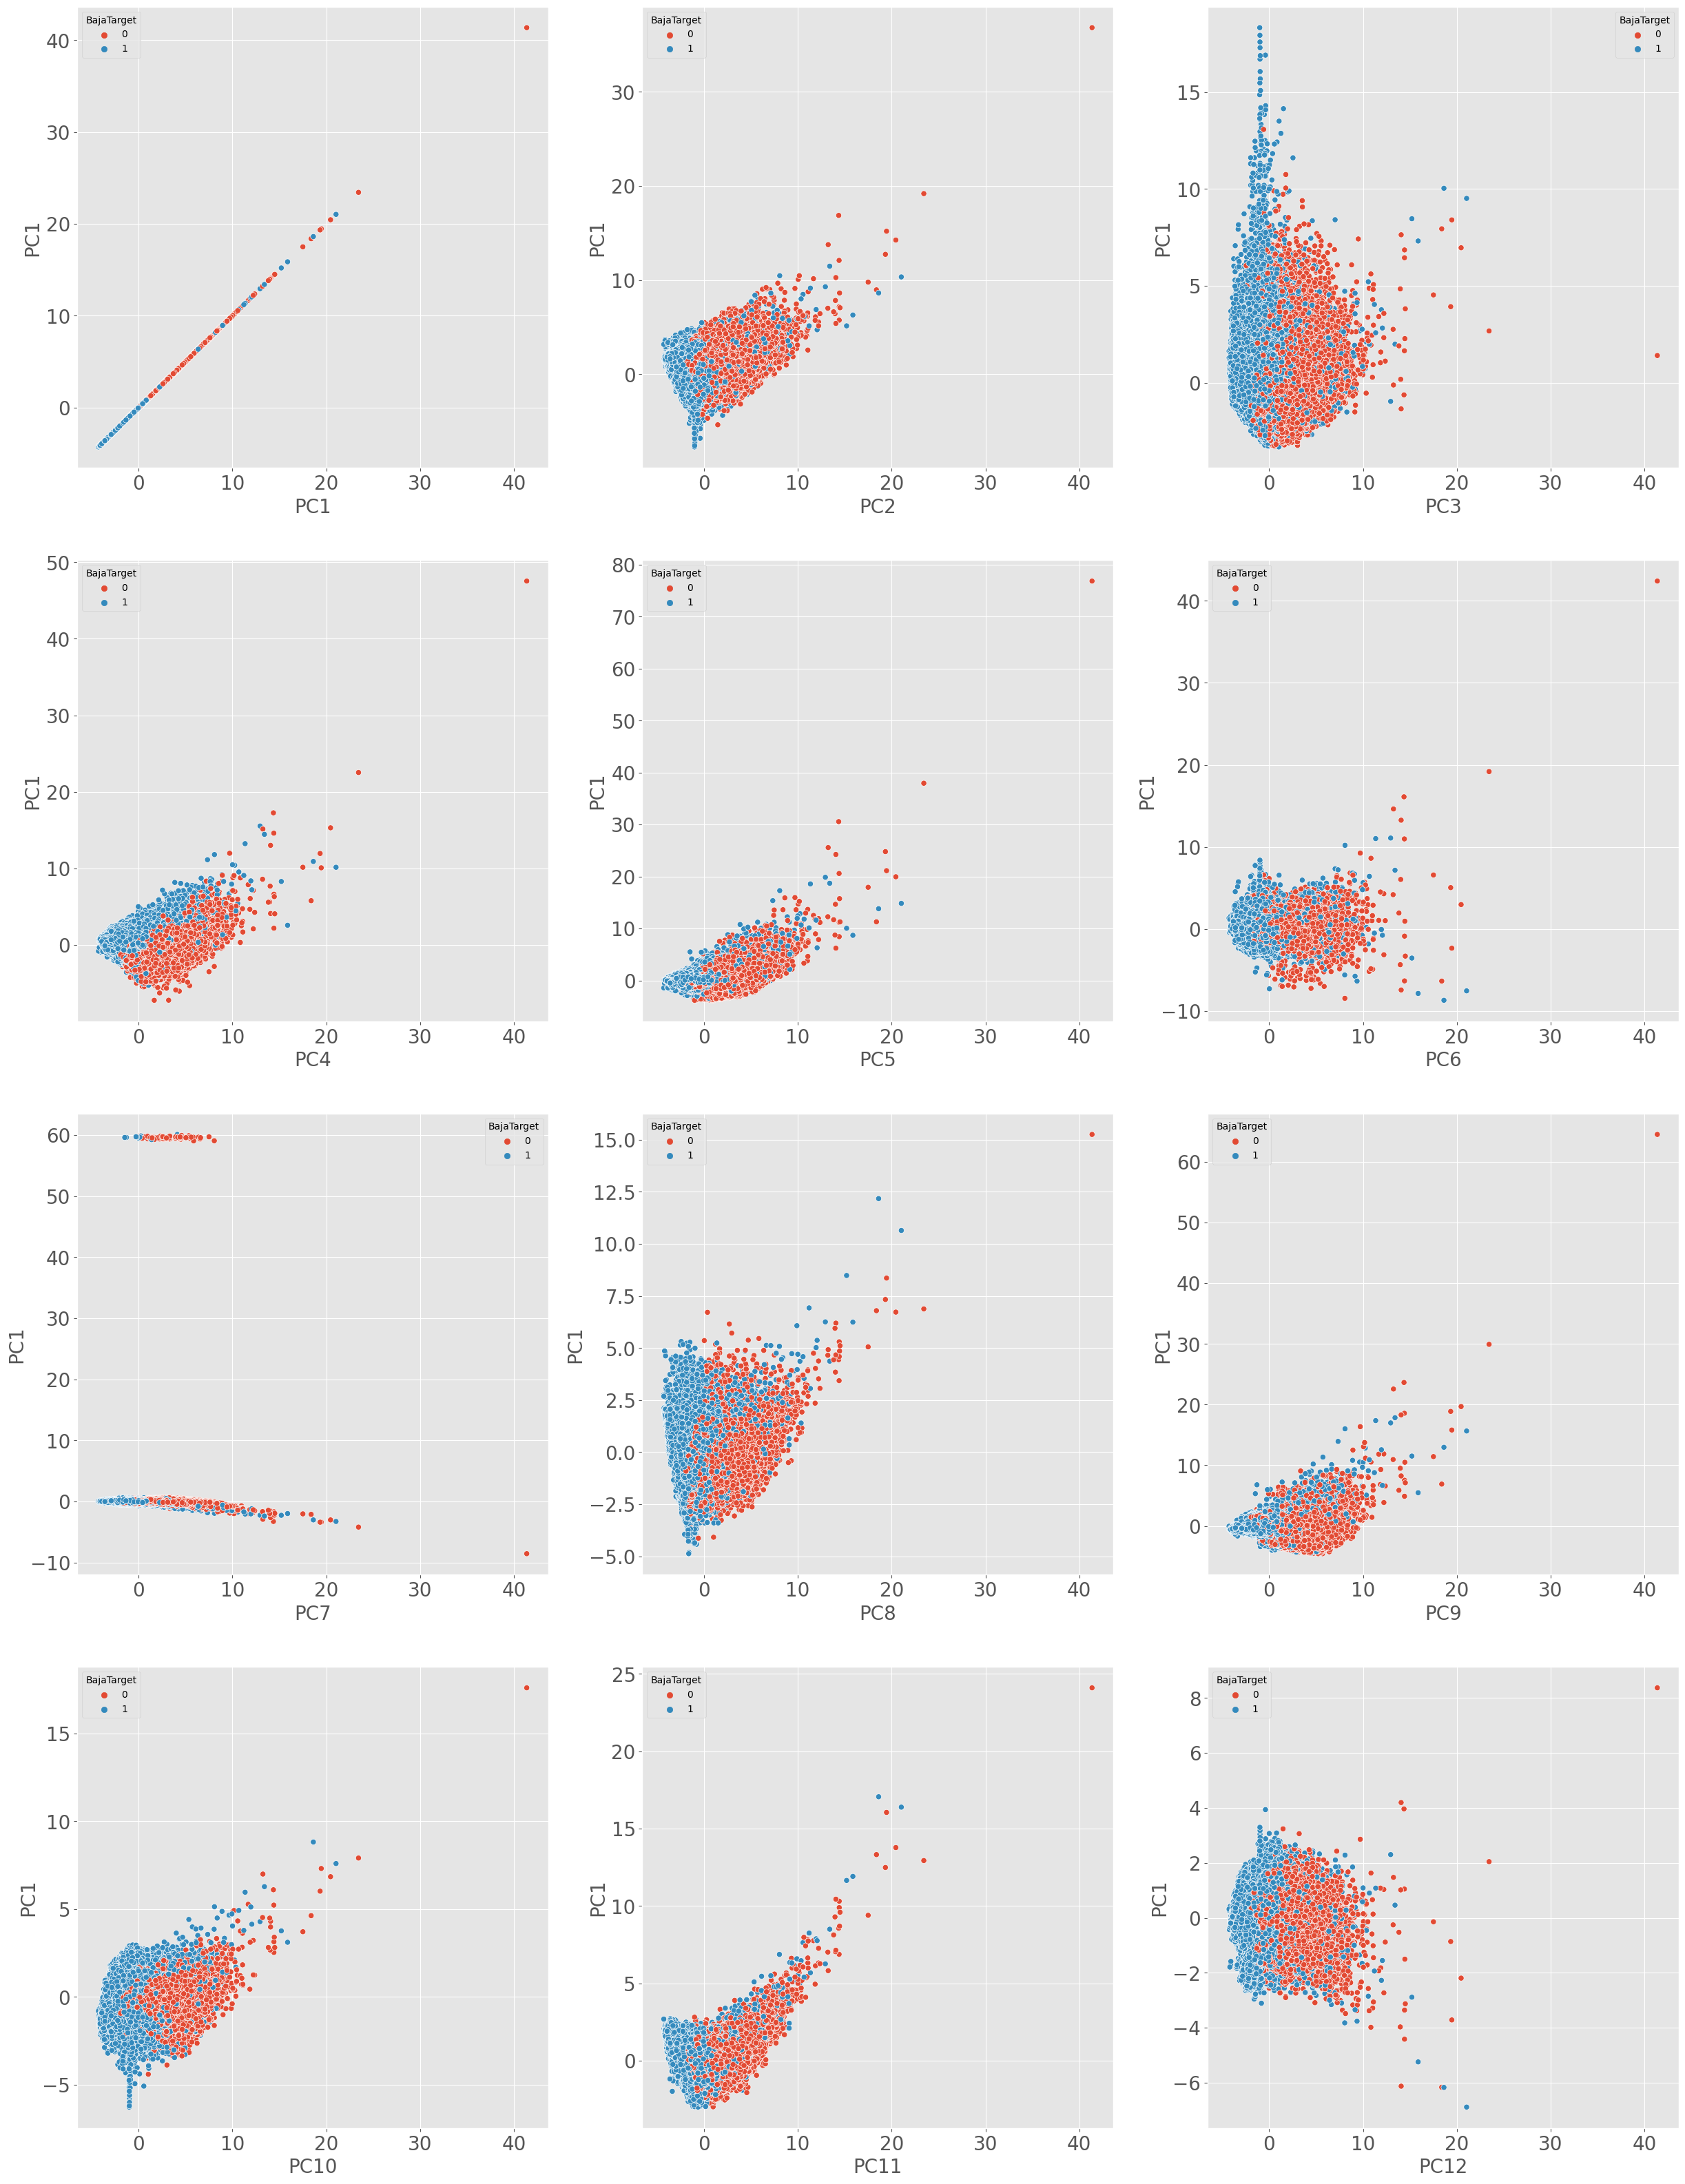

In [59]:
componentes = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
pca_graficos(componentes,'BajaTarget',data_final,3)

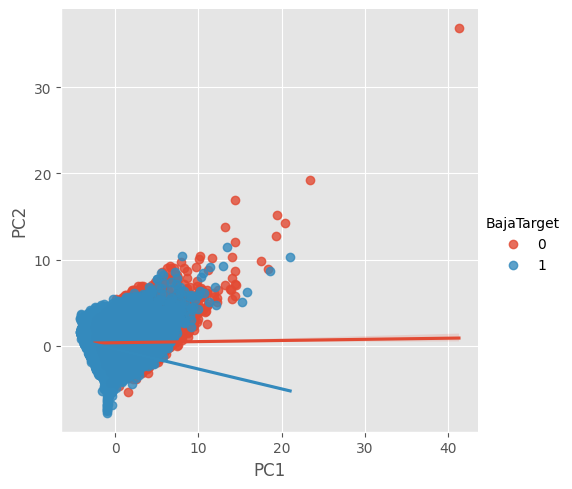

In [60]:
#Grafico
sns.lmplot( x="PC1", y="PC2", data=data_final, hue='BajaTarget')

# 4. Preparación Modelo

### 4.1 Train-Test Split

In [61]:
X = data.drop(columns = ['BajaTarget'])
y = data['BajaTarget'].astype('int32')

In [62]:
# import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split


# split the dataset into train and test set with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234)

print(X_train.shape, X_test.shape)

(243469, 43) (60868, 43)


In [63]:
print(y_train.shape, y_test.shape)

(243469,) (60868,)


### 4.2 Búsqueda de Hiperparámetros

In [64]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict


# Definir los parámetros para cada modelo
parameters = {
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],'max_depth': [50, 100, 150], 'random_state': [256, 512, 1024] },
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy']},
    'GaussianNB': {'var_smoothing': [1e-6, 1e-9, 1e-12] },
    'KNeighborsClassifier': {'n_neighbors': [2, 3, 5, 7]},
    'Perceptron': {'random_state': [1,2,4] , 'tol': [1e-2, 1e-4, 1e-6], 'alpha': [0.0001, 0.001, 0.01]}
}

#parameters = {
#    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy']},
#    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
#    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy']},
#    'GaussianNB': {},
#    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
#    'Perceptron': {'alpha': [0.0001, 0.001, 0.01]}
#}


#parameters = {
#    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy']},
#    'AdaBoostClassifier': {'n_estimators': [50], 'learning_rate': [0.5, 1.0]},
#    'RandomForestClassifier': {'n_estimators': [50], 'criterion': ['gini', 'entropy']},
#    'GaussianNB': {'var_smoothing': [1e-6, 1e-9]},
#    'KNeighborsClassifier': {'n_neighbors': [2]},
#    'Perceptron': {'random_state': [2], 'alpha': [ 0.001, 0.01]}
#}

# Crear una lista de los clasificadores a evaluar
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Perceptron': Perceptron()
}

# Realizar la búsqueda en la cuadrícula para cada clasificador
models = []

for classifier_name, classifier in classifiers.items():
    print("Evaluando:", classifier_name)
    clf = HalvingRandomSearchCV(classifier, parameters[classifier_name], cv=StratifiedKFold(n_splits=5))
    clf.fit(X_train, y_train)
    print("Mejores parámetros encontrados:", clf.best_params_)
    print("Puntuación media de validación cruzada:", clf.best_score_)
    print("----------------------------------------")
    model_item = {'name': classifier_name, 'params': clf.best_params_}
    models.append(model_item)
    print(models)


Evaluando: DecisionTreeClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=12173. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}
Puntuación media de validación cruzada: 0.9609523809523809
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}]
Evaluando: AdaBoostClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=12173. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 50, 'learning_rate': 1.0}
Puntuación media de validación cruzada: 0.9498412698412698
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 50, 'learning_rate': 1.0}}]
Evaluando: RandomForestClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=12173. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 200, 'criterion': 'entropy'}
Puntuación media de validación cruzada: 0.9651515151515151
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 50, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}]
Evaluando: GaussianNB


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=12173. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'var_smoothing': 1e-12}
Puntuación media de validación cruzada: 0.8803030303030303
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 50, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}]
Evaluando: KNeighborsClassifier


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=12173. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'n_neighbors': 5}
Puntuación media de validación cruzada: 0.6803030303030304
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 50, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}, {'name': 'KNeighborsClassifier', 'params': {'n_neighbors': 5}}]
Evaluando: Perceptron


c:\Users\jcalabozo\Anaconda3\envs\JCA-Curso_TechBI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=12173. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'tol': 1e-06, 'random_state': 4, 'alpha': 0.01}
Puntuación media de validación cruzada: 0.5271201107649706
----------------------------------------
[{'name': 'DecisionTreeClassifier', 'params': {'random_state': 256, 'max_depth': 100, 'criterion': 'gini'}}, {'name': 'AdaBoostClassifier', 'params': {'n_estimators': 50, 'learning_rate': 1.0}}, {'name': 'RandomForestClassifier', 'params': {'n_estimators': 200, 'criterion': 'entropy'}}, {'name': 'GaussianNB', 'params': {'var_smoothing': 1e-12}}, {'name': 'KNeighborsClassifier', 'params': {'n_neighbors': 5}}, {'name': 'Perceptron', 'params': {'tol': 1e-06, 'random_state': 4, 'alpha': 0.01}}]


### 4.3 Entrenamiento Modelos

In [65]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn

def train_model(model_name, params, X_train, y_train, X_test, y_test, ax_cm=None, ax_roc=None):
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(**params)
    elif model_name == 'AdaBoostClassifier':
        model = AdaBoostClassifier(**params)
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(**params)
    elif model_name == 'GaussianNB':
        model = GaussianNB(**params)
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier(**params)
    elif model_name == 'Perceptron':
        model = Perceptron(**params)
    else:
        raise ValueError("Invalid model name. Please choose from Decision Tree, AdaBoost, Random Forest, Naïve Bayes, KNN, or Perceptron.")
    
    # Train the model
    
    model.fit(X_train,y_train)
    
    # Make predictions
    y_pred = model.predict(X = X_test)

    # Evaluate the model

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    if ax_cm:
        sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues', ax=ax_cm, cbar=False)
        ax_cm.set_xlabel('Predicted', fontsize=16)
        ax_cm.set_ylabel('Truth', fontsize=16)
        ax_cm.set_title(f"{model_name} (Acc: {accuracy:.2f})", fontsize=18, pad=20)
    
    # Plot ROC curve
    if ax_roc and hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
        yes_probs = y_score[:, 1]
        fpr, tpr, _ = roc_curve(y_test, yes_probs)
        roc_auc = auc(fpr, tpr)
        ax_roc.plot(fpr, tpr, marker='_', label=f'{model_name} (AUC = {roc_auc:.2f})')
        ax_roc.set_title(f"ROC Curve - {model_name}", fontsize=18, pad=20)

    
    print(f"Classification report <{model_name}>")
    print(report)
    
    return model

Classification report <DecisionTreeClassifier>
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     20278
           1       0.96      0.96      0.96     40590

    accuracy                           0.94     60868
   macro avg       0.94      0.94      0.94     60868
weighted avg       0.94      0.94      0.94     60868

Classification report <AdaBoostClassifier>
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20278
           1       1.00      0.95      0.97     40590

    accuracy                           0.97     60868
   macro avg       0.95      0.97      0.96     60868
weighted avg       0.97      0.97      0.97     60868

Classification report <RandomForestClassifier>
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     20278
           1       1.00      0.95      0.97     40590

    accuracy                           0.97  

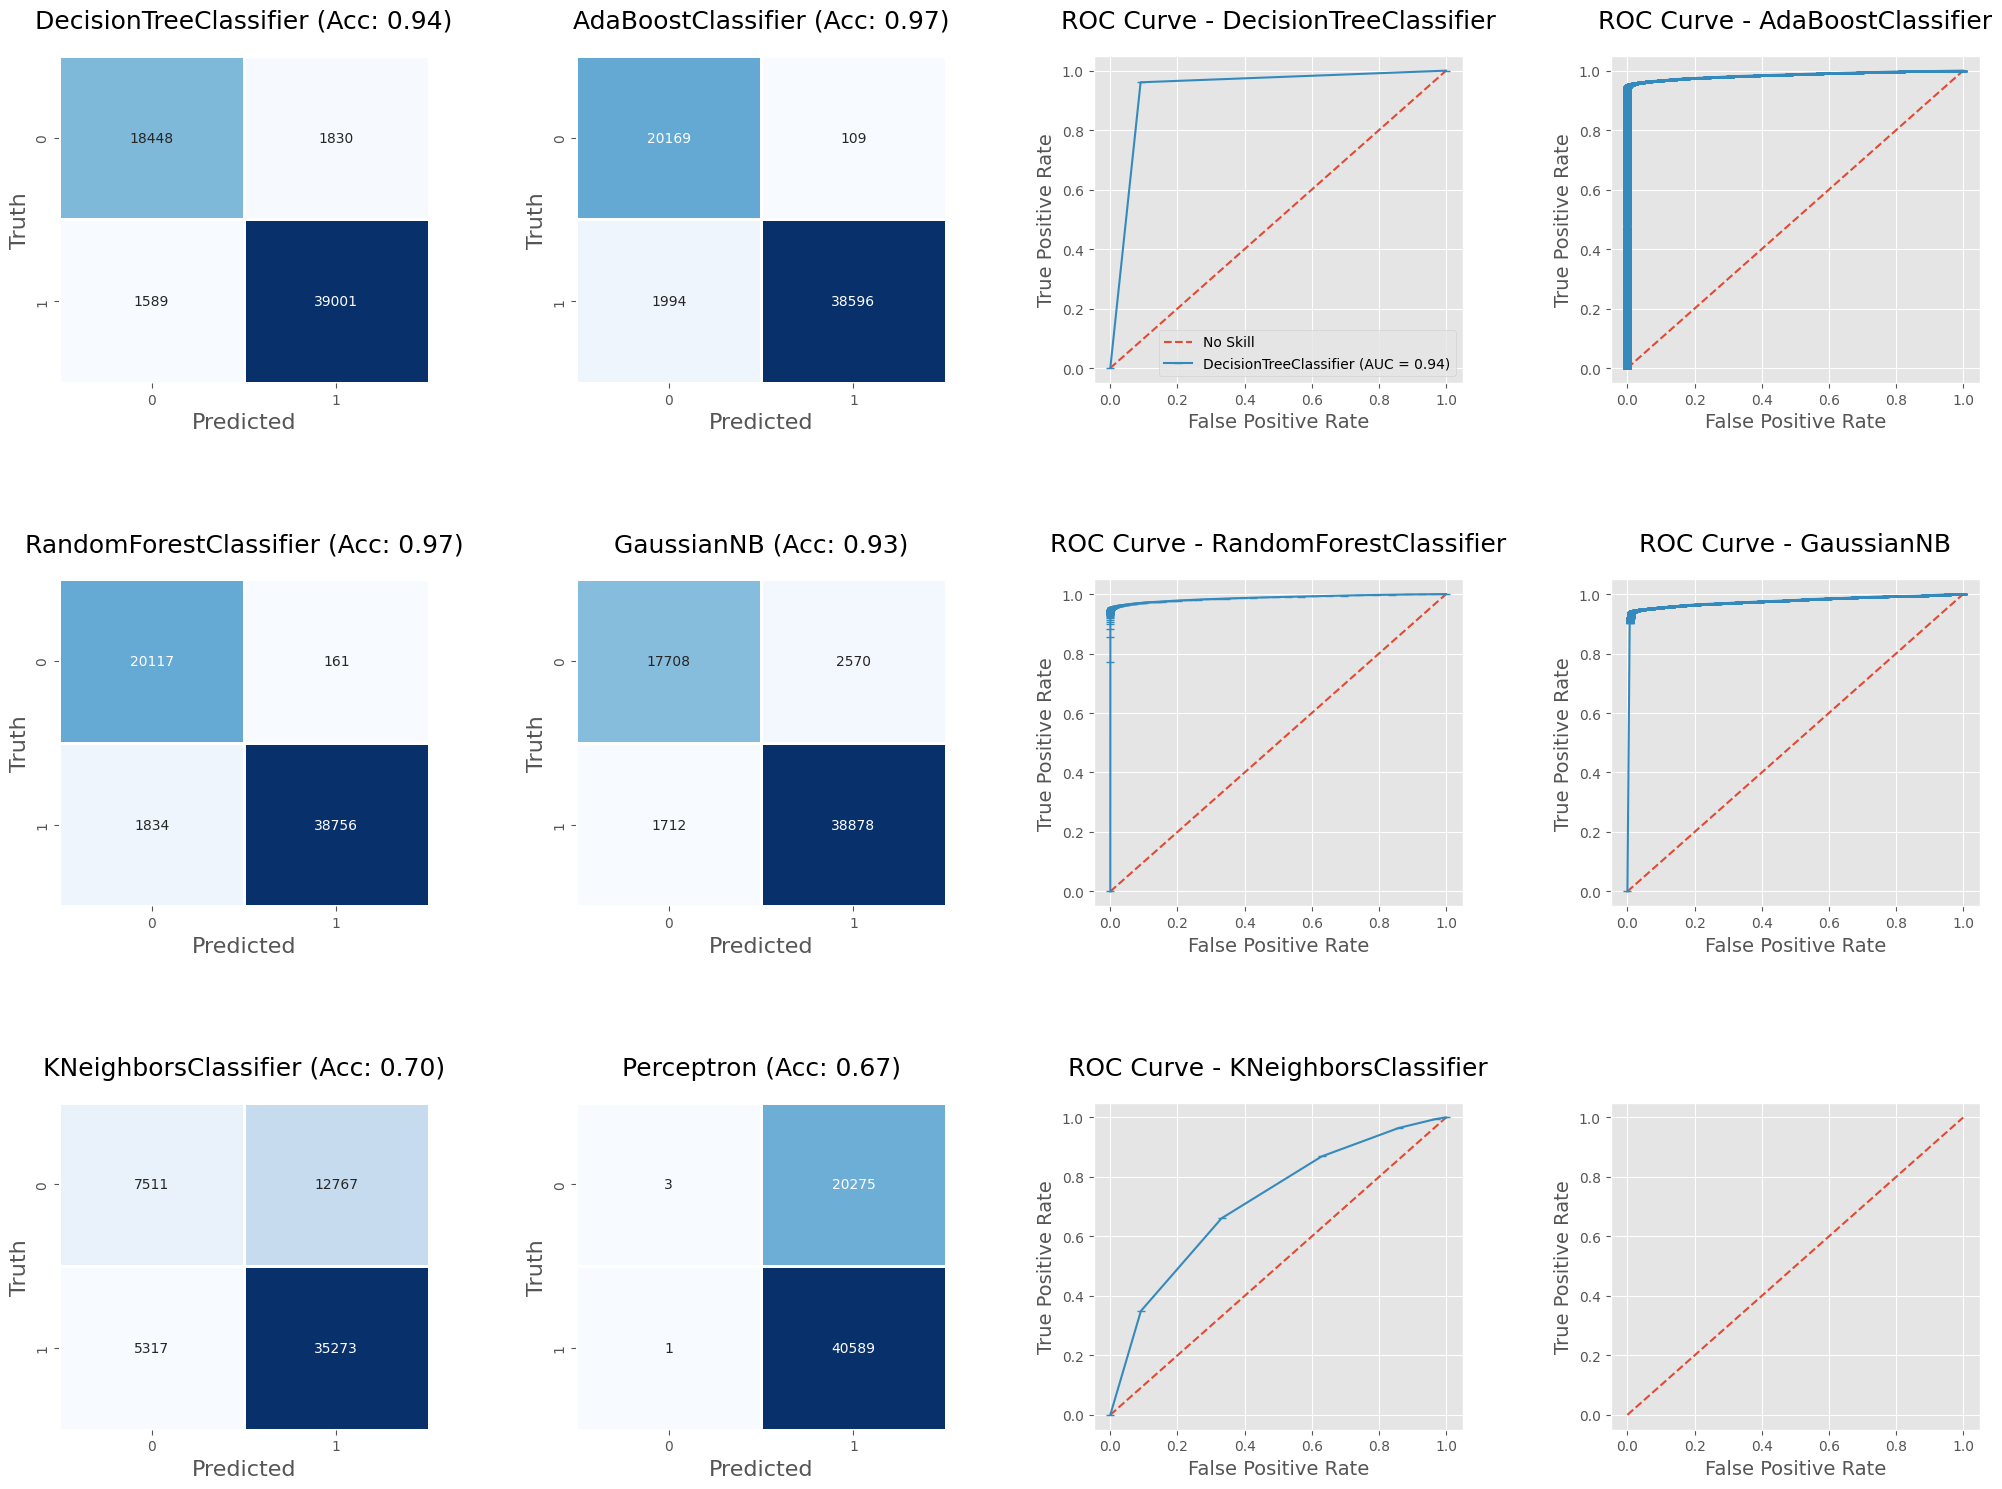

In [66]:
#models = [
#    {'name': 'Decision Tree', 'params': {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}},
#    {'name': 'AdaBoost', 'params': {'n_estimators': 50, 'learning_rate': 1}},
#    {'name': 'Random Forest', 'params': {'criterion': 'entropy'}},
#    {'name': 'Naïve Bayes', 'params': {'var_smoothing': 1e-9}},
#    {'name': 'KNN', 'params': {'n_neighbors': 2}},
#    {'name': 'Perceptron', 'params': {'random_state': 2, 'tol': 1e-4}},
#]

# Plotting confusion matrices and ROC curves for all models in a 3x3 grid
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
cm_axes = axes[:, :2].ravel()
roc_axes = axes[:, 2:].ravel()

# Plot "No-Skill" on ROC Curve
for ax in roc_axes:
    ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    ax.set_xlabel("False Positive Rate", fontsize=14)
    ax.set_ylabel("True Positive Rate", fontsize=14)

for idx, model_info in enumerate(models):
    train_model(model_info['name'], model_info['params'], X_train, y_train, X_test, y_test, ax_cm=cm_axes[idx], ax_roc=roc_axes[idx])

# Set the legend for ROC curves
roc_axes[0].legend()

fig.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Add margins between subplots
plt.show()